In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
from py_pol import degrees, np
from py_pol.mueller import Mueller, create_Mueller, set_printoptions
from py_pol.stokes import Stokes
from py_pol.jones_matrix import Jones_matrix
from py_pol.utils import azimuth_elipt_2_charac_angles, charac_angles_2_azimuth_elipt

np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)
np.set_printoptions(linewidth =100)

## Create arrays

In [22]:
# Create several objectsat once
print(create_Mueller(['J1', 'J2', 'J3']))

print(create_Mueller(['J1']))

print(create_Mueller('J1', N=3))

J1, J2, J3 = create_Mueller(['J1', 'J2', 'J3'])
print(J1, J2, J3)

[J1 is empty
, J2 is empty
, J3 is empty
]
J1 is empty

[J1 is empty
, J1 is empty
, J1 is empty
]
J1 is empty
 J2 is empty
 J3 is empty



In [23]:
# From_components
J = Mueller()
J.from_components((1, 0.5, 0.5, 0, 1, 2, 3, 4, 5, 6, 7, 8 ,9 ,12 ,13, 16))
print(J)

list = []
for ind in range(16):
    list.append(np.arange(ind, 3+ind))
J.from_components(list)
print(J)

list = []
for ind in range(16):
    list.append(np.arange(ind, 6+ind))
J.from_components(list)
print(J)

list = []
for ind in range(16):
    list.append(np.random.rand(3,3)+ind)
J.from_components(list)
print(J)

M = 
[+1.000 +0.500 +0.500 +0.000]   
[+1.000 +2.000 +3.000 +4.000]   
[+5.000 +6.000 +7.000 +8.000]   
[+9.000 +12.000 +13.000 +16.000]   

M = 
[+0.000 +1.000 +2.000 +3.000]   [+1.000 +2.000 +3.000 +4.000]   [+2.000 +3.000 +4.000 +5.000]   
[+4.000 +5.000 +6.000 +7.000]   [+5.000 +6.000 +7.000 +8.000]   [+6.000 +7.000 +8.000 +9.000]   
[+8.000 +9.000 +10.000 +11.000]   [+9.000 +10.000 +11.000 +12.000]   [+10.000 +11.000 +12.000 +13.000]   
[+12.000 +13.000 +14.000 +15.000]   [+13.000 +14.000 +15.000 +16.000]   [+14.000 +15.000 +16.000 +17.000]   

M M00 = [0 1 2 3 4 5]
  M01 = [1 2 3 4 5 6]
  M02 = [2 3 4 5 6 7]
  M03 = [3 4 5 6 7 8]
  M10 = [4 5 6 7 8 9]
  M11 = [ 5  6  7  8  9 10]
  M12 = [ 6  7  8  9 10 11]
  M13 = [ 7  8  9 10 11 12]
  M20 = [ 8  9 10 11 12 13]
  M21 = [ 9 10 11 12 13 14]
  M22 = [10 11 12 13 14 15]
  M23 = [11 12 13 14 15 16]
  M30 = [12 13 14 15 16 17]
  M31 = [13 14 15 16 17 18]
  M32 = [14 15 16 17 18 19]
  M33 = [15 16 17 18 19 20]

M M00 =
 [[0.274  0.1526 

In [24]:
# From_matrix
M = np.eye(4)
J = Mueller()
J.from_matrix(M)
print(J)

M = np.random.rand(4,4,3)
J = Mueller()
J.from_matrix(M)
print(J)

M = np.random.rand(4,4,3,2)
J = Mueller()
J.from_matrix(M)
print(J)

M = 
[+1.000 +0.000 +0.000 +0.000]   
[+0.000 +1.000 +0.000 +0.000]   
[+0.000 +0.000 +1.000 +0.000]   
[+0.000 +0.000 +0.000 +1.000]   

M = 
[+0.655 +0.399 +0.125 +0.210]   [+0.401 +0.130 +0.236 +0.606]   [+0.118 +0.916 +0.975 +0.761]   
[+0.349 +0.262 +0.086 +0.323]   [+0.859 +0.269 +0.109 +0.711]   [+0.714 +0.128 +0.790 +0.361]   
[+0.844 +0.058 +0.512 +0.874]   [+0.618 +0.760 +0.814 +0.879]   [+0.365 +0.586 +0.974 +0.274]   
[+0.527 +0.361 +0.893 +0.925]   [+0.978 +0.064 +0.017 +0.669]   [+0.755 +0.416 +0.769 +0.766]   

M M00 =
 [[0.5813 0.7944]
 [0.3007 0.3889]
 [0.6038 0.5251]]
M M01 =
 [[0.9615 0.5558]
 [0.3364 0.2783]
 [0.3319 0.8312]]
M M02 =
 [[0.3806 0.9304]
 [0.7088 0.2743]
 [0.8252 0.7121]]
M M03 =
 [[0.6721 0.7406]
 [0.39   0.2086]
 [0.6697 0.6104]]
M M10 =
 [[0.4974 0.8007]
 [0.6548 0.4655]
 [0.6749 0.9656]]
M M11 =
 [[0.0625 0.5932]
 [0.443  0.4058]
 [0.2689 0.0497]]
M M12 =
 [[0.2675 0.4025]
 [0.9467 0.0384]
 [0.8251 0.8576]]
M M13 =
 [[0.6061 0.3993]
 [0.4605 0.5696

In [25]:
# From blocks
M00 = 1
P = [1, 2, 3]
D = [1.5, 2.5, 3.5]
m = [[4, 5, 6], [7, 8, 9], [10, 11, 12]]
M = Mueller()
M.from_blocks(M00=M00, D=D, P=P, m=m)
print(M)

M00 = [2, 3]
P = [[4, 5, 6], [7, 8, 9]]
D = [[7, 8, 9], [10, 11, 12]]
m = np.random.rand(3,3,2)
M = Mueller()
M.from_blocks(M00=M00, D=D, P=P, m=m)
print(M)

M00 = np.random.rand(4, 5)
P = np.random.rand(3, 4, 5)
D = np.random.rand(3, 4, 5)
m = np.random.rand(3, 3, 4, 5)
M = Mueller()
M.from_blocks(M00=M00, D=D, P=P, m=m)

M = 
[+1.000 +1.500 +2.500 +3.500]   
[+1.000 +4.000 +5.000 +6.000]   
[+2.000 +7.000 +8.000 +9.000]   
[+3.000 +10.000 +11.000 +12.000]   

M = 
[+2.000 +14.000 +16.000 +18.000]   [+3.000 +30.000 +33.000 +36.000]   
[+8.000 +0.196 +0.344 +0.789]   [+21.000 +1.052 +2.489 +0.703]   
[+10.000 +1.962 +0.600 +1.181]   [+24.000 +2.906 +0.389 +0.494]   
[+12.000 +1.887 +0.913 +1.350]   [+27.000 +0.465 +2.775 +1.256]   



M M00 =
 [[0.5285 0.7942 0.6552 0.6805 0.8352]
 [0.8464 0.9097 0.6346 0.6954 0.9531]
 [0.7563 0.8305 0.1752 0.1885 0.3416]
 [0.0017 0.9687 0.8828 0.7295 0.6988]]
M M01 =
 [[0.11   0.4981 0.1705 0.4185 0.0089]
 [0.288  0.6775 0.5355 0.0693 0.2771]
 [0.0125 0.4992 0.0596 0.1361 0.0197]
 [0.001  0.4058 0.0943 0.6971 0.2939]]
M M02 =
 [[0.489  0.2703 0.5897 0.3199 0.0423]
 [0.4685 0.87   0.0208 0.2588 0.8799]
 [0.4603 0.0465 0.0257 0.17   0.069 ]
 [0.0005 0.2232 0.1327 0.1443 0.4751]]
M M03 =
 [[0.3326 0.2934 0.5362 0.4155 0.1101]
 [0.6665 0.4314 0.607  0.3706 0.7513]
 [0.4319 0.4862 0.1391 0.1188 0.0674]
 [0.0012 0.5347 0.0982 0.5941 0.5921]]
M M10 =
 [[0.4101 0.7574 0.3857 0.4977 0.6559]
 [0.0037 0.1087 0.6163 0.1714 0.4715]
 [0.3426 0.0829 0.1382 0.0221 0.1043]
 [0.0003 0.0761 0.1554 0.1642 0.6826]]
M M11 =
 [[0.5103 0.0165 0.1955 0.1651 0.6474]
 [0.6395 0.5512 0.0951 0.5034 0.0282]
 [0.5017 0.6479 0.1575 0.032  0.0878]
 [0.0009 0.9684 0.8721 0.3433 0.4338]]
M M12 =
 [[0.2945 0.5377 0.3

In [26]:
# vacuum
M = Mueller()
M.vacuum(length=3)
print(M)

M = 
[+1.000 +0.000 +0.000 +0.000]   [+1.000 +0.000 +0.000 +0.000]   [+1.000 +0.000 +0.000 +0.000]   
[+0.000 +1.000 +0.000 +0.000]   [+0.000 +1.000 +0.000 +0.000]   [+0.000 +1.000 +0.000 +0.000]   
[+0.000 +0.000 +1.000 +0.000]   [+0.000 +0.000 +1.000 +0.000]   [+0.000 +0.000 +1.000 +0.000]   
[+0.000 +0.000 +0.000 +1.000]   [+0.000 +0.000 +0.000 +1.000]   [+0.000 +0.000 +0.000 +1.000]   



In [27]:
# filter_amplifier
M = Mueller()
M.filter_amplifier(D=3)
print(M)


M = Mueller()
M.filter_amplifier(D=np.random.rand(3,5))
print(M)

M = 
[+3.000 +0.000 +0.000 +0.000]   
[+0.000 +3.000 +0.000 +0.000]   
[+0.000 +0.000 +3.000 +0.000]   
[+0.000 +0.000 +0.000 +3.000]   

M M00 =
 [[0.9969 0.8455 0.6759 0.903  0.713 ]
 [0.7031 0.3084 0.7511 0.7187 0.6255]
 [0.7093 0.3252 0.6363 0.758  0.1993]]
M M01 =
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
M M02 =
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
M M03 =
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
M M10 =
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
M M11 =
 [[0.9969 0.8455 0.6759 0.903  0.713 ]
 [0.7031 0.3084 0.7511 0.7187 0.6255]
 [0.7093 0.3252 0.6363 0.758  0.1993]]
M M12 =
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
M M13 =
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
M M20 =
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
M M21 =
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
M M22 =
 [[0.9969 0.8455 0.6759 0.903  0.713 ]
 [0.7031 0.3084 0.7511 0.7187 0.6255]
 [0.7093 0.3252 0

In [28]:
# mirror
M = Mueller()
M.mirror(length=3)
print(M)

M = 
[+1.000 +0.000 +0.000 +0.000]   [+1.000 +0.000 +0.000 +0.000]   [+1.000 +0.000 +0.000 +0.000]   
[+0.000 +1.000 +0.000 +0.000]   [+0.000 +1.000 +0.000 +0.000]   [+0.000 +1.000 +0.000 +0.000]   
[+0.000 +0.000 -1.000 +0.000]   [+0.000 +0.000 -1.000 +0.000]   [+0.000 +0.000 -1.000 +0.000]   
[+0.000 +0.000 +0.000 -1.000]   [+0.000 +0.000 +0.000 -1.000]   [+0.000 +0.000 +0.000 -1.000]   



In [31]:
# depolarizer
M = Mueller()
M.depolarizer_diagonal(d=np.random.rand(3,5))
print(M)

M M00 =
 [[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
M M01 =
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
M M02 =
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
M M03 =
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
M M10 =
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
M M11 =
 [[0.747  0.3596 0.5565 0.8936 0.0522]
 [0.1139 0.3064 0.2927 0.4899 0.6948]
 [0.2474 0.3856 0.7388 0.902  0.6043]]
M M12 =
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
M M13 =
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
M M20 =
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
M M21 =
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
M M22 =
 [[0.747  0.3596 0.5565 0.8936 0.0522]
 [0.1139 0.3064 0.2927 0.4899 0.6948]
 [0.2474 0.3856 0.7388 0.902  0.6043]]
M M23 =
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
M M30 =
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
M M31 =
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0

In [32]:
# diattenuator_perfect
M = Mueller()
M.diattenuator_perfect(azimuth=np.random.rand(3,5) * 180*degrees)
print(M)

M M00 =
 [[0.5 0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5 0.5]]
M M01 =
 [[ 0.3295  0.4975 -0.37    0.3152  0.1195]
 [ 0.3887  0.4937 -0.4744  0.0329  0.4981]
 [-0.1621 -0.4446 -0.2369  0.4205  0.3077]]
M M02 =
 [[ 0.3761 -0.0504 -0.3363 -0.3881 -0.4855]
 [ 0.3146  0.0792  0.1579 -0.4989 -0.0436]
 [-0.473  -0.2288 -0.4403  0.2705 -0.3941]]
M M03 =
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
M M10 =
 [[ 0.3295  0.4975 -0.37    0.3152  0.1195]
 [ 0.3887  0.4937 -0.4744  0.0329  0.4981]
 [-0.1621 -0.4446 -0.2369  0.4205  0.3077]]
M M11 =
 [[0.2171 0.4949 0.2738 0.1987 0.0285]
 [0.3021 0.4875 0.4501 0.0022 0.4962]
 [0.0525 0.3953 0.1122 0.3537 0.1893]]
M M12 =
 [[ 0.2478 -0.0502  0.2489 -0.2447 -0.116 ]
 [ 0.2445  0.0782 -0.1498 -0.0328 -0.0434]
 [ 0.1533  0.2035  0.2086  0.2275 -0.2425]]
M M13 =
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
M M20 =
 [[ 0.3761 -0.0504 -0.3363 -0.3881 -0.4855]
 [ 0.3146  0.0792  0.1579 -0.4989 -0.0436]
 [-0.473  -0.2288 

In [33]:
# diattenuator_linear
M = Mueller()
M.diattenuator_linear(p2=0.5)
print(M)

M = 
[+0.625 +0.375 +0.000 +0.000]   
[+0.375 +0.625 +0.000 +0.000]   
[+0.000 +0.000 +0.500 +0.000]   
[+0.000 +0.000 +0.000 +0.500]   



In [34]:
# from_Jones
M = np.array([[1, 0], [0, 1j]])
J = Jones_matrix()
J.from_matrix(M)
M = Mueller()
M.from_Jones(J)
print(M)

M = 
[+1.000 +0.000 +0.000 +0.000]   
[+0.000 +1.000 +0.000 +0.000]   
[+0.000 +0.000 +0.000 -1.000]   
[+0.000 +0.000 +1.000 +0.000]   



In [35]:
# diattenuator_vector
D = [0, 1, 0]
M = Mueller()
M.diattenuator_vector(D)
print(M)

D = np.random.rand(3,5)
M = Mueller()
M.diattenuator_vector(D)
print(M)

D = np.random.rand(3,2, 5)
M = Mueller()
M.diattenuator_vector(D)
print(M)

M = 
[+0.500 +0.000 +0.500 +0.000]   
[+0.000 +0.000 +0.000 +0.000]   
[+0.500 +0.000 +0.500 +0.000]   
[+0.000 +0.000 +0.000 +0.000]   

M = 
[+0.500 +0.345 +0.052 +0.358]   [+0.500 +0.106 +0.324 +0.366]   [+0.500 +0.187 +0.332 +0.323]   [+0.500 +0.285 +0.226 +0.343]   [+0.574 +0.266 +0.168 +0.287]   
[+0.345 +0.239 +0.036 +0.247]   [+0.106 +0.023 +0.069 +0.078]   [+0.187 +0.070 +0.124 +0.121]   [+0.285 +0.163 +0.129 +0.196]   [+0.266 +0.458 +0.047 +0.080]   
[+0.052 +0.036 +0.005 +0.037]   [+0.324 +0.069 +0.210 +0.237]   [+0.332 +0.124 +0.221 +0.215]   [+0.226 +0.129 +0.102 +0.155]   [+0.168 +0.047 +0.414 +0.050]   
[+0.358 +0.247 +0.037 +0.256]   [+0.366 +0.078 +0.237 +0.267]   [+0.323 +0.121 +0.215 +0.209]   [+0.343 +0.196 +0.155 +0.236]   [+0.287 +0.080 +0.050 +0.470]   

M M00 =
 [[0.5    0.5    0.5    0.5    0.5   ]
 [0.5    0.5978 0.5354 0.5039 0.5   ]]
M M01 =
 [[0.2146 0.1038 0.2047 0.3181 0.0592]
 [0.1915 0.02   0.3088 0.233  0.361 ]]
M M02 =
 [[0.1437 0.2703 0.2241 0.3108 0

In [36]:
# diattenuator_charac_angles
M = Mueller()
M.diattenuator_charac_angles(Tmax=0.9, Tmin=0.3, alpha=45*degrees, delay=30*degrees)
print(M)


M = Mueller()
P1 = np.random.rand(5)
M.diattenuator_charac_angles(Tmax=0.9, Tmin=P1, alpha=45*degrees, delay=30*degrees)
print(M)


M = Mueller()
angle = np.random.rand(3,5) * 90*degrees
M.diattenuator_charac_angles(Tmax=0.9, Tmin=0.3, alpha=angle, delay=30*degrees)
print(M)

M = 
[+0.600 +0.000 +0.260 +0.150]   
[+0.000 +0.520 +0.000 +0.000]   
[+0.260 +0.000 +0.580 +0.035]   
[+0.150 +0.000 +0.035 +0.540]   

M = 
[+0.529 +0.000 +0.321 +0.185]   [+0.587 +0.000 +0.271 +0.157]   [+0.561 +0.000 +0.294 +0.170]   [+0.766 +0.000 +0.116 +0.067]   [+0.665 +0.000 +0.203 +0.117]   
[+0.000 +0.378 +0.000 +0.000]   [+0.000 +0.497 +0.000 +0.000]   [+0.000 +0.446 +0.000 +0.000]   [+0.000 +0.754 +0.000 +0.000]   [+0.000 +0.622 +0.000 +0.000]   
[+0.321 +0.000 +0.491 +0.066]   [+0.271 +0.000 +0.564 +0.039]   [+0.294 +0.000 +0.532 +0.050]   [+0.116 +0.000 +0.763 +0.005]   [+0.203 +0.000 +0.654 +0.019]   
[+0.185 +0.000 +0.066 +0.415]   [+0.157 +0.000 +0.039 +0.519]   [+0.170 +0.000 +0.050 +0.475]   [+0.067 +0.000 +0.005 +0.757]   [+0.117 +0.000 +0.019 +0.633]   

M M00 =
 [[0.6 0.6 0.6 0.6 0.6]
 [0.6 0.6 0.6 0.6 0.6]
 [0.6 0.6 0.6 0.6 0.6]]
M M01 =
 [[ 0.2729  0.299   0.2962 -0.2865  0.0434]
 [ 0.1775  0.046   0.0055  0.2862 -0.3   ]
 [ 0.2513  0.0377  0.2906 -0.289   0.2

In [37]:
# diattenuator_azimuth_ellipticity
M = Mueller()
M.diattenuator_azimuth_ellipticity(Tmax=0.9, Tmin=0.3, azimuth=45*degrees, ellipticity=30*degrees)
print(M)


M = Mueller()
P1 = np.random.rand(5)
M.diattenuator_azimuth_ellipticity(Tmax=0.9, Tmin=P1, azimuth=45*degrees, ellipticity=30*degrees)
print(M)


M = Mueller()
angle = np.random.rand(3,5) * 90*degrees
M.diattenuator_azimuth_ellipticity(Tmax=0.9, Tmin=0.3, azimuth=angle, ellipticity=30*degrees)
print(M)

M = 
[+0.600 +0.000 +0.150 +0.260]   
[+0.000 +0.520 +0.000 +0.000]   
[+0.150 +0.000 +0.540 +0.035]   
[+0.260 +0.000 +0.035 +0.580]   

M = 
[+0.529 +0.000 +0.186 +0.322]   [+0.926 -0.000 -0.013 -0.022]   [+0.904 -0.000 -0.002 -0.004]   [+0.833 +0.000 +0.033 +0.058]   [+0.667 +0.000 +0.116 +0.202]   
[+0.000 +0.376 +0.000 +0.000]   [-0.000 +0.925 +0.000 +0.000]   [-0.000 +0.904 +0.000 +0.000]   [+0.000 +0.831 +0.000 +0.000]   [+0.000 +0.625 +0.000 +0.000]   
[+0.186 +0.000 +0.414 +0.066]   [-0.013 +0.000 +0.925 +0.000]   [-0.002 +0.000 +0.904 +0.000]   [+0.033 +0.000 +0.831 +0.001]   [+0.116 +0.000 +0.636 +0.018]   
[+0.322 +0.000 +0.066 +0.491]   [-0.022 +0.000 +0.000 +0.926]   [-0.004 +0.000 +0.000 +0.904]   [+0.058 +0.000 +0.001 +0.833]   [+0.202 +0.000 +0.018 +0.657]   

M M00 =
 [[0.6 0.6 0.6 0.6 0.6]
 [0.6 0.6 0.6 0.6 0.6]
 [0.6 0.6 0.6 0.6 0.6]]
M M01 =
 [[-0.1318  0.1474 -0.086  -0.11   -0.1379]
 [-0.0142  0.0106 -0.1237  0.0367 -0.0921]
 [-0.1415  0.1378  0.1089 -0.0256 -0.0

In [38]:
# retarder_vector
D = [0, 1, 0]
M = Mueller()
M.retarder_vector(D)
print(M)

D = [0, 135*degrees, 0]
M = Mueller()
M.retarder_vector(D, kind='complete')
print(M)

D = [0, 135*degrees/np.pi, 0]
M = Mueller()
M.retarder_vector(D, kind='straight')
print(M)

D = np.random.rand(3,5)
M = Mueller()
M.retarder_vector(D, kind='complete')
print(M)

D = np.random.rand(3,4, 5)
M = Mueller()
M.retarder_vector(D, kind='complete')
print(M)

M = 
[+1.000 +0.000 +0.000 +0.000]   
[+0.000 +0.000 +0.000 -1.000]   
[+0.000 +0.000 +1.000 +0.000]   
[+0.000 +1.000 +0.000 +0.000]   

M = 
[+1.000 +0.000 +0.000 +0.000]   
[+0.000 -0.707 +0.000 -0.707]   
[+0.000 +0.000 +1.000 +0.000]   
[+0.000 +0.707 +0.000 -0.707]   

M = 
[+1.000 +0.000 +0.000 +0.000]   
[+0.000 -0.707 +0.000 -0.707]   
[+0.000 +0.000 +1.000 +0.000]   
[+0.000 +0.707 +0.000 -0.707]   

M = 
[+1.000 +0.000 +0.000 +0.000]   [+1.000 +0.000 +0.000 +0.000]   [+1.000 +0.000 +0.000 +0.000]   [+1.000 +0.000 +0.000 +0.000]   [+1.000 +0.000 +0.000 +0.000]   
[+0.000 +0.747 +0.441 -0.497]   [+0.000 +0.872 +0.163 -0.462]   [+0.000 +0.350 +0.831 -0.432]   [+0.000 +0.229 +0.780 -0.582]   [+0.000 +0.564 +0.814 -0.136]   
[+0.000 +0.122 +0.644 +0.755]   [+0.000 +0.054 +0.906 +0.421]   [+0.000 -0.675 +0.544 +0.499]   [+0.000 -0.590 +0.587 +0.555]   [+0.000 -0.690 +0.555 +0.465]   
[+0.000 +0.653 -0.625 +0.427]   [+0.000 +0.487 -0.392 +0.781]   [+0.000 +0.650 +0.116 +0.751]   [+

In [39]:
# retarder_linear
M = Mueller()
M.retarder_linear(R=45*degrees)
print(M)

M = Mueller()
M.retarder_linear(R=45*degrees, azimuth=np.linspace(0, 90*degrees, 5))
print(M)

M = Mueller()
M.retarder_linear(R=45*degrees, azimuth=np.random.rand(3,5))
print(M)

M = 
[+1.000 +0.000 +0.000 +0.000]   
[+0.000 +1.000 +0.000 +0.000]   
[+0.000 +0.000 +0.707 +0.707]   
[+0.000 +0.000 -0.707 +0.707]   

M = 
[+1.000 +0.000 +0.000 +0.000]   [+1.000 +0.000 +0.000 +0.000]   [+1.000 +0.000 +0.000 +0.000]   [+1.000 +0.000 +0.000 +0.000]   [+1.000 +0.000 +0.000 +0.000]   
[+0.000 +1.000 +0.000 +0.000]   [+0.000 +0.854 +0.146 -0.500]   [+0.000 +0.707 +0.000 -0.707]   [+0.000 +0.854 -0.146 -0.500]   [+0.000 +1.000 -0.000 -0.000]   
[+0.000 +0.000 +0.707 +0.707]   [+0.000 +0.146 +0.854 +0.500]   [+0.000 +0.000 +1.000 +0.000]   [+0.000 -0.146 +0.854 -0.500]   [+0.000 -0.000 +0.707 -0.707]   
[+0.000 +0.000 -0.707 +0.707]   [+0.000 +0.500 -0.500 +0.707]   [+0.000 +0.707 -0.000 +0.707]   [+0.000 +0.500 +0.500 +0.707]   [+0.000 +0.000 +0.707 +0.707]   

M M00 =
 [[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
M M01 =
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
M M02 =
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
M M03 =
 [[0. 0. 0. 

In [40]:
# diattenuator_retarder_linear
M = Mueller()
M.diattenuator_retarder_linear(p2=0.5, R=45*degrees)
print(M)

M = Mueller()
M.diattenuator_retarder_linear(p2=0.5, R=45*degrees, azimuth=np.linspace(0, 90*degrees, 5))
print(M)

M = Mueller()
M.diattenuator_retarder_linear(p2=0.5, R=45*degrees, azimuth=np.random.rand(3,5))
print(M)

M = 
[+0.625 +0.625 +0.000 +0.000]   
[+0.625 +0.625 +0.000 +0.000]   
[+0.000 +0.000 +0.354 +0.354]   
[+0.000 +0.000 -0.354 +0.354]   

M = 
[+0.625 +0.625 +0.000 +0.000]   [+0.625 +0.442 +0.442 +0.000]   [+0.625 +0.000 +0.625 +0.000]   [+0.625 -0.442 +0.442 +0.000]   [+0.625 -0.625 +0.000 +0.000]   
[+0.625 +0.625 +0.000 +0.000]   [+0.442 +0.489 +0.136 -0.250]   [+0.000 +0.354 +0.000 -0.354]   [-0.442 +0.489 -0.136 -0.250]   [-0.625 +0.625 -0.000 -0.000]   
[+0.000 +0.000 +0.354 +0.354]   [+0.442 +0.136 +0.489 +0.250]   [+0.625 +0.000 +0.625 +0.000]   [+0.442 -0.136 +0.489 -0.250]   [+0.000 -0.000 +0.354 -0.354]   
[+0.000 +0.000 -0.354 +0.354]   [+0.000 +0.250 -0.250 +0.354]   [+0.000 +0.354 -0.000 +0.354]   [+0.000 +0.250 +0.250 +0.354]   [+0.000 +0.000 +0.354 +0.354]   

M M00 =
 [[0.625 0.625 0.625 0.625 0.625]
 [0.625 0.625 0.625 0.625 0.625]
 [0.625 0.625 0.625 0.625 0.625]]
M M01 =
 [[-0.1599 -0.1241  0.5017  0.5378 -0.0882]
 [ 0.2341  0.1025  0.0978  0.2653 -0.1297]
 [ 0.187

In [41]:
# quarter_waveplate
M = Mueller()
M.quarter_waveplate()
print(M)

M = Mueller()
M.quarter_waveplate(azimuth=np.linspace(0, 90*degrees, 5))
print(M)

M = Mueller()
M.quarter_waveplate(azimuth=np.random.rand(3,5))
print(M)

M = 
[+1.000 +0.000 +0.000 +0.000]   
[+0.000 +1.000 +0.000 +0.000]   
[+0.000 +0.000 +0.000 +1.000]   
[+0.000 +0.000 -1.000 +0.000]   

M = 
[+1.000 +0.000 +0.000 +0.000]   [+1.000 +0.000 +0.000 +0.000]   [+1.000 +0.000 +0.000 +0.000]   [+1.000 +0.000 +0.000 +0.000]   [+1.000 +0.000 +0.000 +0.000]   
[+0.000 +1.000 +0.000 +0.000]   [+0.000 +0.500 +0.500 -0.707]   [+0.000 +0.000 +0.000 -1.000]   [+0.000 +0.500 -0.500 -0.707]   [+0.000 +1.000 -0.000 -0.000]   
[+0.000 +0.000 +0.000 +1.000]   [+0.000 +0.500 +0.500 +0.707]   [+0.000 +0.000 +1.000 +0.000]   [+0.000 -0.500 +0.500 -0.707]   [+0.000 -0.000 +0.000 -1.000]   
[+0.000 +0.000 -1.000 +0.000]   [+0.000 +0.707 -0.707 +0.000]   [+0.000 +1.000 -0.000 +0.000]   [+0.000 +0.707 +0.707 +0.000]   [+0.000 +0.000 +1.000 +0.000]   

M M00 =
 [[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
M M01 =
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
M M02 =
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
M M03 =
 [[0. 0. 0. 

In [42]:
# half_waveplate
M = Mueller()
M.half_waveplate()
print(M)

M = Mueller()
M.half_waveplate(azimuth=np.linspace(0, 90*degrees, 5))
print(M)

M = Mueller()
M.half_waveplate(azimuth=np.random.rand(3,5))
print(M)

M = 
[+1.000 +0.000 +0.000 +0.000]   
[+0.000 +1.000 +0.000 +0.000]   
[+0.000 +0.000 -1.000 +0.000]   
[+0.000 +0.000 +0.000 -1.000]   

M = 
[+1.000 +0.000 +0.000 +0.000]   [+1.000 +0.000 +0.000 +0.000]   [+1.000 +0.000 +0.000 +0.000]   [+1.000 +0.000 +0.000 +0.000]   [+1.000 +0.000 +0.000 +0.000]   
[+0.000 +1.000 +0.000 +0.000]   [+0.000 +0.000 +1.000 +0.000]   [+0.000 -1.000 +0.000 +0.000]   [+0.000 -0.000 -1.000 +0.000]   [+0.000 +1.000 -0.000 +0.000]   
[+0.000 +0.000 -1.000 +0.000]   [+0.000 +1.000 +0.000 +0.000]   [+0.000 +0.000 +1.000 +0.000]   [+0.000 -1.000 +0.000 +0.000]   [+0.000 -0.000 -1.000 +0.000]   
[+0.000 +0.000 +0.000 -1.000]   [+0.000 +0.000 +0.000 -1.000]   [+0.000 +0.000 +0.000 -1.000]   [+0.000 +0.000 +0.000 -1.000]   [+0.000 +0.000 +0.000 -1.000]   

M M00 =
 [[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
M M01 =
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
M M02 =
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
M M03 =
 [[0. 0. 0. 

In [43]:
# retarder_charac_angles
M = Mueller()
M.retarder_charac_angles(R=90*degrees, alpha=0, delay=0)
print(M)

M = Mueller()
M.retarder_charac_angles(R=90*degrees, alpha=np.linspace(0, 90*degrees, 5), delay=0)
print(M)

M = Mueller()
M.retarder_charac_angles(R=90*degrees, alpha=np.linspace(0, 90*degrees, 15), delay=np.random.rand(3,5)*360*degrees)
print(M)

M = 
[+1.000 +0.000 +0.000 +0.000]   
[+0.000 +1.000 +0.000 +0.000]   
[+0.000 +0.000 +0.000 +1.000]   
[+0.000 +0.000 -1.000 +0.000]   

M = 
[+1.000 +0.000 +0.000 +0.000]   [+1.000 +0.000 +0.000 +0.000]   [+1.000 +0.000 +0.000 +0.000]   [+1.000 +0.000 +0.000 +0.000]   [+1.000 +0.000 +0.000 +0.000]   
[+0.000 +1.000 +0.000 +0.000]   [+0.000 +0.500 +0.500 -0.707]   [+0.000 +0.000 +0.000 -1.000]   [+0.000 +0.500 -0.500 -0.707]   [+0.000 +1.000 -0.000 -0.000]   
[+0.000 +0.000 +0.000 +1.000]   [+0.000 +0.500 +0.500 +0.707]   [+0.000 +0.000 +1.000 +0.000]   [+0.000 -0.500 +0.500 -0.707]   [+0.000 -0.000 +0.000 -1.000]   
[+0.000 +0.000 -1.000 +0.000]   [+0.000 +0.707 -0.707 +0.000]   [+0.000 +1.000 -0.000 +0.000]   [+0.000 +0.707 +0.707 +0.000]   [+0.000 +0.000 +1.000 +0.000]   

M M00 =
 [[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
M M01 =
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
M M02 =
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
M M03 =
 [[0. 0. 0. 

In [44]:
# retarder_azimuth_ellipticity
M = Mueller()
M.retarder_azimuth_ellipticity(R=90*degrees, azimuth=0, ellipticity=0)
print(M)

M = Mueller()
M.retarder_azimuth_ellipticity(R=90*degrees, azimuth=np.linspace(0, 90*degrees, 5), ellipticity=0)
print(M)

M = Mueller()
M.retarder_azimuth_ellipticity(R=90*degrees, azimuth=np.linspace(0, 90*degrees, 15), ellipticity=np.random.rand(3,5)*45*degrees)
print(M)

M = 
[+1.000 +0.000 +0.000 +0.000]   
[+0.000 +1.000 +0.000 +0.000]   
[+0.000 +0.000 +0.000 +1.000]   
[+0.000 +0.000 -1.000 +0.000]   

M = 
[+1.000 +0.000 +0.000 +0.000]   [+1.000 +0.000 +0.000 +0.000]   [+1.000 +0.000 +0.000 +0.000]   [+1.000 +0.000 +0.000 +0.000]   [+1.000 +0.000 +0.000 +0.000]   
[+0.000 +1.000 +0.000 +0.000]   [+0.000 +0.500 +0.500 -0.707]   [+0.000 +0.000 +0.000 -1.000]   [+0.000 +0.500 -0.500 -0.707]   [+0.000 +1.000 -0.000 -0.000]   
[+0.000 +0.000 +0.000 +1.000]   [+0.000 +0.500 +0.500 +0.707]   [+0.000 +0.000 +1.000 +0.000]   [+0.000 -0.500 +0.500 -0.707]   [+0.000 -0.000 +0.000 -1.000]   
[+0.000 +0.000 -1.000 +0.000]   [+0.000 +0.707 -0.707 +0.000]   [+0.000 +1.000 -0.000 +0.000]   [+0.000 +0.707 +0.707 +0.000]   [+0.000 +0.000 +1.000 +0.000]   

M M00 =
 [[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
M M01 =
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
M M02 =
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
M M03 =
 [[0. 0. 0. 

In [4]:
# depolarizer_states
M = np.array([[1, 1, 0, 0], [1, 0, 1, 0], [1, 0, 0, 1]])
S = Stokes()
S.from_matrix(M)
print(S)
M1 = Mueller()
M1.depolarizer_states(S=S, d=[.7, .6, .5])
print(M1)

S = 
[+1.000]   [+1.000]   [+1.000]   
[+1.000]   [+0.000]   [+0.000]   
[+0.000]   [+1.000]   [+0.000]   
[+0.000]   [+0.000]   [+1.000]   

M = 
[+1.000 +0.000 +0.000 +0.000]   
[+0.000 +0.700 +0.000 +0.000]   
[+0.000 +0.000 +0.600 +0.000]   
[+0.000 +0.000 +0.000 +0.500]   



## Operations

In [45]:
M00 = 2
P = [1, 2, 3]
D = [1.5, 2.5, 3.5]
m = [[4, 5, 6], [7, 8, 9], [10, 11, 12]]
M = Mueller()
M.from_blocks(M00=M00, D=D, P=P, m=m)
_ = M.parameters.blocks(verbose=True)

The block components of M are:
  - M_00 of M is:
2.0

  - Diattenuation vector of M is:
  D[0]
[0.75]
  D[1]
[1.25]
  D[2]
[1.75]

  - Polarizance vector of M is:
  P[0]
[0.5]
  P[1]
[1.]
  P[2]
[1.5]

  - Small matrix of M is:
  m[0,0]
[2.]
  m[0,1]
[2.5]
  m[0,2]
[3.]
  m[1,0]
[3.5]
  m[1,1]
[4.]
  m[1,2]
[4.5]
  m[2,0]
[5.]
  m[2,1]
[5.5]
  m[2,2]
[6.]



In [48]:
# Sum
M1, M2 = create_Mueller(('M1', 'M2'))
M1.mirror()
M2.depolarizer_diagonal(d=.5)
print(M1 + M2)


M2.depolarizer_diagonal(d=np.array([.5, .3]))
print(M1 + M2)

M1 + M2 = 
[+2.000 +0.000 +0.000 +0.000]   
[+0.000 +1.500 +0.000 +0.000]   
[+0.000 +0.000 -0.500 +0.000]   
[+0.000 +0.000 +0.000 -0.500]   

M1 + M2 = 
[+2.000 +0.000 +0.000 +0.000]   [+2.000 +0.000 +0.000 +0.000]   
[+0.000 +1.500 +0.000 +0.000]   [+0.000 +1.300 +0.000 +0.000]   
[+0.000 +0.000 -0.500 +0.000]   [+0.000 +0.000 -0.700 +0.000]   
[+0.000 +0.000 +0.000 -0.500]   [+0.000 +0.000 +0.000 -0.700]   



In [51]:
# Multiply by number, right
M1 = Mueller()
M1.depolarizer_diagonal(d=.5)
print(M1 * 3)

# Multiply by array, right
M1 = Mueller()
M1.depolarizer_diagonal(d=.5)
print(M1 * np.linspace(1, 3, 5))

3 * M = 
[+3.000 +0.000 +0.000 +0.000]   
[+0.000 +1.500 +0.000 +0.000]   
[+0.000 +0.000 +1.500 +0.000]   
[+0.000 +0.000 +0.000 +1.500]   

M = 
[+1.000 +0.000 +0.000 +0.000]   [+1.500 +0.000 +0.000 +0.000]   [+2.000 +0.000 +0.000 +0.000]   [+2.500 +0.000 +0.000 +0.000]   [+3.000 +0.000 +0.000 +0.000]   
[+0.000 +0.500 +0.000 +0.000]   [+0.000 +0.750 +0.000 +0.000]   [+0.000 +1.000 +0.000 +0.000]   [+0.000 +1.250 +0.000 +0.000]   [+0.000 +1.500 +0.000 +0.000]   
[+0.000 +0.000 +0.500 +0.000]   [+0.000 +0.000 +0.750 +0.000]   [+0.000 +0.000 +1.000 +0.000]   [+0.000 +0.000 +1.250 +0.000]   [+0.000 +0.000 +1.500 +0.000]   
[+0.000 +0.000 +0.000 +0.500]   [+0.000 +0.000 +0.000 +0.750]   [+0.000 +0.000 +0.000 +1.000]   [+0.000 +0.000 +0.000 +1.250]   [+0.000 +0.000 +0.000 +1.500]   



In [53]:
# Divide by number, right
M1 = Mueller()
M1.depolarizer_diagonal(d=.5)
print(M1 / 3)

# Divide by array, right
M1 = Mueller()
M1.depolarizer_diagonal(d=.5)
print(M1 / np.linspace(1, 3, 5))

M / 3 = 
[+0.333 +0.000 +0.000 +0.000]   
[+0.000 +0.167 +0.000 +0.000]   
[+0.000 +0.000 +0.167 +0.000]   
[+0.000 +0.000 +0.000 +0.167]   

M = 
[+1.000 +0.000 +0.000 +0.000]   [+0.667 +0.000 +0.000 +0.000]   [+0.500 +0.000 +0.000 +0.000]   [+0.400 +0.000 +0.000 +0.000]   [+0.333 +0.000 +0.000 +0.000]   
[+0.000 +0.500 +0.000 +0.000]   [+0.000 +0.333 +0.000 +0.000]   [+0.000 +0.250 +0.000 +0.000]   [+0.000 +0.200 +0.000 +0.000]   [+0.000 +0.167 +0.000 +0.000]   
[+0.000 +0.000 +0.500 +0.000]   [+0.000 +0.000 +0.333 +0.000]   [+0.000 +0.000 +0.250 +0.000]   [+0.000 +0.000 +0.200 +0.000]   [+0.000 +0.000 +0.167 +0.000]   
[+0.000 +0.000 +0.000 +0.500]   [+0.000 +0.000 +0.000 +0.333]   [+0.000 +0.000 +0.000 +0.250]   [+0.000 +0.000 +0.000 +0.200]   [+0.000 +0.000 +0.000 +0.167]   



In [55]:
# Multiply by number, left
M1 = Mueller()
M1.depolarizer_diagonal(d=.5)
print(3 * M1)

# Multiply by array, left
M1 = Mueller()
M1.depolarizer_diagonal(d=.5)
print(np.linspace(1, 3, 5) * M1)

3 * M = 
[+3.000 +0.000 +0.000 +0.000]   
[+0.000 +1.500 +0.000 +0.000]   
[+0.000 +0.000 +1.500 +0.000]   
[+0.000 +0.000 +0.000 +1.500]   

M = 
[+1.000 +0.000 +0.000 +0.000]   [+1.500 +0.000 +0.000 +0.000]   [+2.000 +0.000 +0.000 +0.000]   [+2.500 +0.000 +0.000 +0.000]   [+3.000 +0.000 +0.000 +0.000]   
[+0.000 +0.500 +0.000 +0.000]   [+0.000 +0.750 +0.000 +0.000]   [+0.000 +1.000 +0.000 +0.000]   [+0.000 +1.250 +0.000 +0.000]   [+0.000 +1.500 +0.000 +0.000]   
[+0.000 +0.000 +0.500 +0.000]   [+0.000 +0.000 +0.750 +0.000]   [+0.000 +0.000 +1.000 +0.000]   [+0.000 +0.000 +1.250 +0.000]   [+0.000 +0.000 +1.500 +0.000]   
[+0.000 +0.000 +0.000 +0.500]   [+0.000 +0.000 +0.000 +0.750]   [+0.000 +0.000 +0.000 +1.000]   [+0.000 +0.000 +0.000 +1.250]   [+0.000 +0.000 +0.000 +1.500]   



In [56]:
# Multiply two matrices
M1 = Mueller('M1')
M1.from_components((1, 2, 3, 5, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4))
M2 = Mueller('M2')
M2.from_components((1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4))
print(M1 * M2)

# Multiply two matrices, 1D
M1 = Mueller('M1')
M1.from_components((1, 2, 3, 5, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4))
M2 = Mueller('M2')
M2.from_components((1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4), length=3)
print(M1 * M2)

M1 * M2 = 
[+34.000 +34.000 +34.000 +34.000]   
[+30.000 +30.000 +30.000 +30.000]   
[+30.000 +30.000 +30.000 +30.000]   
[+30.000 +30.000 +30.000 +30.000]   

M1 * M2 = 
[+34.000 +34.000 +34.000 +34.000]   [+34.000 +34.000 +34.000 +34.000]   [+34.000 +34.000 +34.000 +34.000]   
[+30.000 +30.000 +30.000 +30.000]   [+30.000 +30.000 +30.000 +30.000]   [+30.000 +30.000 +30.000 +30.000]   
[+30.000 +30.000 +30.000 +30.000]   [+30.000 +30.000 +30.000 +30.000]   [+30.000 +30.000 +30.000 +30.000]   
[+30.000 +30.000 +30.000 +30.000]   [+30.000 +30.000 +30.000 +30.000]   [+30.000 +30.000 +30.000 +30.000]   



In [57]:
# getitem
M = np.random.rand(4, 4, 3, 5)
J = Mueller('Test')
J.from_matrix(M)
print(J)

J2 = J[0]
print(J2)

J2 = J[0:3]
print(J2)

J3 = J[1, 1]
print(J3)

J3 = J[0:3, 0:2]
print(J3)

J4 = J[np.linspace(2, 6, 3, dtype=int)]
print(J4)

aux = M[0,0,:,:] > 0.5
J4 = J[aux]
print(J4)

Test M00 =
 [[0.6588 0.8837 0.1692 0.5712 0.2819]
 [0.5036 0.935  0.8497 0.7735 0.9581]
 [0.3946 0.8034 0.1833 0.5875 0.7022]]
Test M01 =
 [[0.6607 0.9449 0.4244 0.5709 0.1811]
 [0.3574 0.0327 0.3578 0.4634 0.3529]
 [0.747  0.4397 0.5041 0.9573 0.2223]]
Test M02 =
 [[0.3338 0.1721 0.7653 0.0707 0.5304]
 [0.641  0.4543 0.3302 0.2991 0.2568]
 [0.6977 0.9743 0.7071 0.4392 0.5347]]
Test M03 =
 [[0.8116 0.2569 0.0064 0.2703 0.429 ]
 [0.8287 0.6338 0.8691 0.1997 0.1325]
 [0.1248 0.6555 0.3371 0.0434 0.301 ]]
Test M10 =
 [[0.2799 0.4486 0.2787 0.2174 0.9582]
 [0.7181 0.9301 0.6465 0.5358 0.2301]
 [0.5121 0.3044 0.4561 0.8314 0.2523]]
Test M11 =
 [[0.1772 0.6663 0.9965 0.5981 0.9978]
 [0.8711 0.8344 0.906  0.1229 0.1428]
 [0.6331 0.996  0.2302 0.5583 0.8974]]
Test M12 =
 [[0.2135 0.8581 0.18   0.8658 0.4819]
 [0.4154 0.5306 0.6379 0.7574 0.1779]
 [0.6141 0.8016 0.4272 0.9187 0.2435]]
Test M13 =
 [[0.7457 0.4875 0.9056 0.3388 0.0969]
 [0.993  0.1603 0.1414 0.8982 0.3782]
 [0.7896 0.7573 0.0159 

In [58]:
# setitem
M = np.random.rand(4, 4, 3, 5)
J = Mueller('Test')
J2 = Mueller('New')
J.from_matrix(M)
print(J)

J2.vacuum()
J[0] = J2
print(J)

angle = np.array([0, 45, 90]) * degrees
J2.diattenuator_linear(p1=1, p2=0, azimuth=angle)
J.from_matrix(M)
J[0:3] = J2
print(J)

J2.vacuum()
J.from_matrix(M)
J[1,1] = J2
print(J)

J2.vacuum(length=6)
J2.shape = [3, 2]
J.from_matrix(M)
J[0:3, 0:2] = J2
print(J)

J2.vacuum(length=3)
J.from_matrix(M)
J[np.linspace(2, 6, 3, dtype=int)] = J2
print(J)

J2.vacuum()
aux = M[0,0,:,:] > 0.5
J.from_matrix(M)
J[aux] = J2
print(J)

Test M00 =
 [[0.6051 0.1379 0.272  0.618  0.4614]
 [0.0011 0.4945 0.8436 0.7047 0.8906]
 [0.9127 0.3338 0.0512 0.9281 0.4791]]
Test M01 =
 [[0.9857 0.0884 0.6332 0.0082 0.6005]
 [0.3627 0.8002 0.9557 0.9153 0.2622]
 [0.1034 0.8207 0.3188 0.4986 0.0425]]
Test M02 =
 [[0.0663 0.0814 0.3693 0.7627 0.8711]
 [0.4976 0.91   0.46   0.9855 0.2721]
 [0.4553 0.6856 0.7396 0.0703 0.5153]]
Test M03 =
 [[0.006  0.507  0.471  0.7833 0.6981]
 [0.768  0.2331 0.6684 0.8446 0.4255]
 [0.2584 0.0035 0.0397 0.4329 0.6912]]
Test M10 =
 [[0.8096 0.65   0.203  0.4162 0.091 ]
 [0.1202 0.5832 0.6279 0.1721 0.9498]
 [0.9652 0.3473 0.7482 0.7576 0.1258]]
Test M11 =
 [[0.6707 0.7799 0.4978 0.5709 0.8322]
 [0.6507 0.8383 0.298  0.8879 0.0408]
 [0.2699 0.9791 0.1847 0.0775 0.1749]]
Test M12 =
 [[0.9722 0.1981 0.9    0.099  0.9006]
 [0.0105 0.031  0.0152 0.8254 0.0699]
 [0.1349 0.9859 0.5375 0.9203 0.0969]]
Test M13 =
 [[0.0257 0.8075 0.0025 0.4043 0.417 ]
 [0.6365 0.3725 0.0133 0.8135 0.011 ]
 [0.5366 0.9857 0.9541 

## Manipulations

In [59]:
# Reciprocal
M = np.random.rand(4,4)
M1 = Mueller()
M1.from_matrix(M)
M1.reciprocal(keep=False)
print(M1)

Reciprocal of M = 
[+0.064 +0.269 -0.057 +0.410]   
[+0.291 +0.611 -0.503 +0.262]   
[-0.279 -0.869 +0.216 -0.403]   
[+0.525 +0.491 -0.191 +0.489]   



In [60]:
# Covariance
M = np.array([[1, -0.0299, 0.0027, 0.0058],
             [-0.0186, 0.9956, -0.0361, 0.0318],
             [-0.0129, 0.0392, 0.2207, -0.9656],
             [0.0014, 0.028, 0.9706, 0.2231]])
M1 = Mueller()
M1.from_matrix(M)
print(M1)
M1.covariance_matrix(keep=False)
print(M1)

M = np.array([M, M])
M1 = Mueller()
M1.from_matrix(M)
print(M1)
M1.covariance_matrix(keep=False)
print(M1)

M = 
[+1.000 -0.030 +0.003 +0.006]   
[-0.019 +0.996 -0.036 +0.032]   
[-0.013 +0.039 +0.221 -0.966]   
[+0.001 +0.028 +0.971 +0.223]   

Covariant of M = 
[+0.487+0.000j -0.008+0.009j +0.007-0.007j +0.111-0.484j]   
[-0.008-0.009j +0.004+0.000j -0.001-0.001j -0.013+0.007j]   
[+0.007+0.007j -0.001+0.001j -0.002+0.000j +0.010-0.007j]   
[+0.111+0.484j -0.013-0.007j +0.010+0.007j +0.511+0.000j]   

M = 
[+1.000 -0.030 +0.003 +0.006]   [+1.000 -0.030 +0.003 +0.006]   
[-0.019 +0.996 -0.036 +0.032]   [-0.019 +0.996 -0.036 +0.032]   
[-0.013 +0.039 +0.221 -0.966]   [-0.013 +0.039 +0.221 -0.966]   
[+0.001 +0.028 +0.971 +0.223]   [+0.001 +0.028 +0.971 +0.223]   

Covariant of M = 
[+0.487+0.000j -0.008+0.009j +0.007-0.007j +0.111-0.484j]   [+0.487+0.000j -0.008+0.009j +0.007-0.007j +0.111-0.484j]   
[-0.008-0.009j +0.004+0.000j -0.001-0.001j -0.013+0.007j]   [-0.008-0.009j +0.004+0.000j -0.001-0.001j -0.013+0.007j]   
[+0.007+0.007j -0.001+0.001j -0.002+0.000j +0.010-0.007j]   [+0.007+0.007

In [61]:
# Inverse
M = np.random.rand(4,4)
print(M)
M_inv = np.linalg.inv(M)
print(M_inv)
M1 = Mueller()
M1.from_matrix(M)
M1.inverse(keep=False)
print(M1)

M = np.array([M, M])
M1 = Mueller()
M1.from_matrix(M)
print(M1)
M1.inverse(keep=False)
print(M1)

[[0.4978 0.52   0.1718 0.8654]
 [0.6095 0.7815 0.3387 0.7412]
 [0.9696 0.644  0.8155 0.8598]
 [0.8997 0.9383 0.5053 0.1119]]
[[ 5.6029 -7.0221  0.0626  2.701 ]
 [-2.6702  4.3405 -1.0046 -0.3803]
 [-5.1413  4.3161  1.7032 -1.9148]
 [ 0.558   0.5742  0.2294 -0.9449]]
Inverse of M = 
[+5.603 -7.022 +0.063 +2.701]   
[-2.670 +4.341 -1.005 -0.380]   
[-5.141 +4.316 +1.703 -1.915]   
[+0.558 +0.574 +0.229 -0.945]   

M = 
[+0.498 +0.520 +0.172 +0.865]   [+0.498 +0.520 +0.172 +0.865]   
[+0.609 +0.781 +0.339 +0.741]   [+0.609 +0.781 +0.339 +0.741]   
[+0.970 +0.644 +0.816 +0.860]   [+0.970 +0.644 +0.816 +0.860]   
[+0.900 +0.938 +0.505 +0.112]   [+0.900 +0.938 +0.505 +0.112]   

Inverse of M = 
[+5.603 -7.022 +0.063 +2.701]   [+5.603 -7.022 +0.063 +2.701]   
[-2.670 +4.341 -1.005 -0.380]   [-2.670 +4.341 -1.005 -0.380]   
[-5.141 +4.316 +1.703 -1.915]   [-5.141 +4.316 +1.703 -1.915]   
[+0.558 +0.574 +0.229 -0.945]   [+0.558 +0.574 +0.229 -0.945]   



In [62]:
# Sum
M = np.random.rand(4,4,7)
M_sum = np.sum(M, axis=2)
print(M_sum)
M1 = Mueller()
M1.from_matrix(M)
M1.sum(keep=False)
print(M1)

M = np.random.rand(4,4,7, 2)
M_sum = np.sum(M, axis=2)
print(M_sum)
M1 = Mueller()
M1.from_matrix(M)
M1.sum(keep=False, axis=0)
print(M1)

[[4.258  2.7375 3.0953 4.6762]
 [3.3477 3.4765 2.7943 3.7375]
 [2.4513 2.6773 2.7286 5.4701]
 [3.2378 4.0904 2.2318 2.7313]]
Sum of M = 
[+4.258 +2.738 +3.095 +4.676]   
[+3.348 +3.476 +2.794 +3.737]   
[+2.451 +2.677 +2.729 +5.470]   
[+3.238 +4.090 +2.232 +2.731]   

[[[2.6284 3.7821]
  [3.0079 4.4521]
  [3.7883 3.6465]
  [4.4181 4.4818]]

 [[3.2038 2.2931]
  [4.4659 2.3319]
  [4.3016 4.5303]
  [3.963  3.6659]]

 [[3.5643 4.1571]
  [3.5755 4.4377]
  [4.4975 3.2886]
  [2.5316 2.4611]]

 [[3.9021 3.0414]
  [3.1234 2.9692]
  [3.8462 3.0058]
  [4.9228 3.2883]]]
Sum of M = 
[+2.628 +3.008 +3.788 +4.418]   [+3.782 +4.452 +3.647 +4.482]   
[+3.204 +4.466 +4.302 +3.963]   [+2.293 +2.332 +4.530 +3.666]   
[+3.564 +3.576 +4.497 +2.532]   [+4.157 +4.438 +3.289 +2.461]   
[+3.902 +3.123 +3.846 +4.923]   [+3.041 +2.969 +3.006 +3.288]   



In [63]:
# Prod
M = np.random.rand(4,4,7)
M1 = Mueller()
M1.from_matrix(M)
M1.prod(keep=False)
print(M1)

M = np.random.rand(4,4,7, 2)
M1 = Mueller()
M1.from_matrix(M)
M1.prod(keep=False, axis=0)
print(M1)

Prod of M = 
[+18.838 +33.817 +23.625 +23.326]   
[+19.571 +35.135 +24.545 +24.235]   
[+19.535 +35.075 +24.503 +24.194]   
[+15.579 +27.977 +19.544 +19.299]   

Prod of M = 
[+28.878 +44.642 +15.768 +31.358]   [+24.549 +40.501 +26.525 +20.235]   
[+21.220 +32.804 +11.586 +23.043]   [+36.563 +60.323 +39.506 +30.137]   
[+19.492 +30.130 +10.647 +21.160]   [+34.712 +57.269 +37.506 +28.611]   
[+17.205 +26.595 +9.397 +18.679]   [+41.116 +67.835 +44.426 +33.890]   



In [64]:
# Rotation
M = Mueller()
M.diattenuator_linear(azimuth=45*degrees)
M.rotate(-45*degrees)
print(M)


M = Mueller()
M.diattenuator_linear()
M.rotate(np.linspace(0,90,5)*degrees)
print(M)

M @ 45.00 deg @ -45.00 deg = 
[+0.500 +0.500 +0.000 +0.000]   
[+0.500 +0.500 +0.000 +0.000]   
[+0.000 +0.000 -0.000 +0.000]   
[+0.000 +0.000 +0.000 +0.000]   

M = 
[+0.500 +0.500 +0.000 +0.000]   [+0.500 +0.354 +0.354 +0.000]   [+0.500 +0.000 +0.500 +0.000]   [+0.500 -0.354 +0.354 +0.000]   [+0.500 -0.500 +0.000 +0.000]   
[+0.500 +0.500 +0.000 +0.000]   [+0.354 +0.250 +0.250 +0.000]   [+0.000 +0.000 +0.000 +0.000]   [-0.354 +0.250 -0.250 +0.000]   [-0.500 +0.500 -0.000 +0.000]   
[+0.000 +0.000 +0.000 +0.000]   [+0.354 +0.250 +0.250 +0.000]   [+0.500 +0.000 +0.500 +0.000]   [+0.354 -0.250 +0.250 +0.000]   [+0.000 -0.000 +0.000 +0.000]   
[+0.000 +0.000 +0.000 +0.000]   [+0.000 +0.000 +0.000 +0.000]   [+0.000 +0.000 +0.000 +0.000]   [+0.000 +0.000 +0.000 +0.000]   [+0.000 +0.000 +0.000 +0.000]   



In [65]:
# Transpose
M = Mueller()
M.from_matrix(np.random.rand(4,4,3,5))
M2 = M.transpose(keep=True)
print(M, M2)

M M00 =
 [[0.6911 0.1145 0.6827 0.9796 0.4412]
 [0.3695 0.1666 0.5248 0.7615 0.7215]
 [0.2727 0.8463 0.5781 0.492  0.3702]]
M M01 =
 [[0.3528 0.2982 0.6915 0.1553 0.4533]
 [0.9151 0.8994 0.7778 0.5599 0.2437]
 [0.587  0.7331 0.2989 0.2921 0.0176]]
M M02 =
 [[0.1834 0.5844 0.7942 0.7081 0.2038]
 [0.876  0.3831 0.7564 0.7376 0.0656]
 [0.6749 0.4997 0.7845 0.026  0.4812]]
M M03 =
 [[0.1923 0.2564 0.0922 0.7918 0.3508]
 [0.2894 0.7356 0.5774 0.7657 0.9606]
 [0.2219 0.2043 0.0827 0.1359 0.9943]]
M M10 =
 [[0.2047 0.4324 0.3322 0.9304 0.8392]
 [0.0774 0.3566 0.5225 0.2166 0.5159]
 [0.7202 0.0343 0.4197 0.2068 0.076 ]]
M M11 =
 [[0.4515 0.7766 0.3912 0.4663 0.519 ]
 [0.6766 0.2885 0.2852 0.4591 0.4679]
 [0.3283 0.1528 0.9993 0.6379 0.9936]]
M M12 =
 [[0.4685 0.4969 0.3027 0.6232 0.9848]
 [0.3985 0.2489 0.9318 0.5894 0.2407]
 [0.0741 0.8076 0.7412 0.4468 0.7972]]
M M13 =
 [[0.8232 0.5218 0.9742 0.7417 0.1483]
 [0.8531 0.7992 0.1435 0.9364 0.1097]
 [0.9096 0.3715 0.9414 0.3253 0.073 ]]
M M20 =


## Parameters

The global phase of M is (deg):
The mean value is 178.31886584887582 +- 104.08458763278169


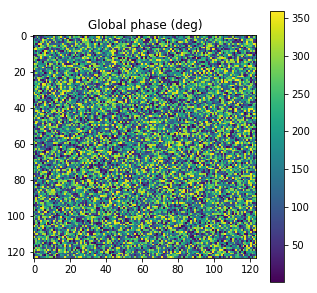

In [66]:
# Global phase
M = Mueller()
phase = np.random.rand(124, 124) * 360 * degrees
M.from_matrix(np.random.rand(4,4,124,124), global_phase=phase)
_ = M.parameters.global_phase(draw=True)

The mean transmission of M is:
The mean value is 0.498656008760468 +- 0.28723555913455234


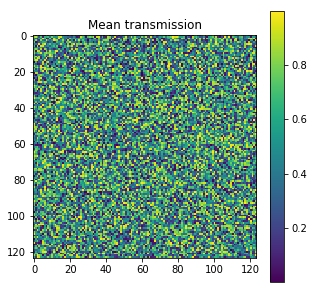

In [67]:
# mean_transmission
M = Mueller()
phase = np.random.rand(124, 124) * 360 * degrees
M.from_matrix(np.random.rand(4,4,124,124), global_phase=phase)
_ = M.parameters.mean_transmission(draw=True)

The diattenuation vector of M is:
The mean value of param D[0] is 0.5045384860031636 +- 0.28874103194810136
The mean value of param D[1] is 0.505371453056251 +- 0.2887020152568286
The mean value of param D[2] is 0.5029680956543261 +- 0.2895479443047954


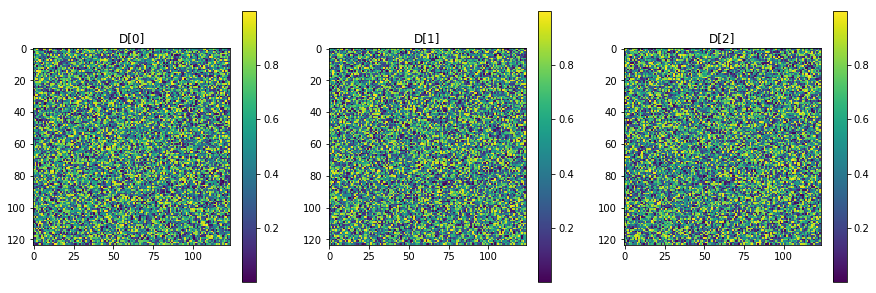

In [68]:
# diattenuation_vector
M = Mueller()
mat = np.random.rand(4, 4, 124, 124)
mat[0,0,:] = 1
M.from_matrix(mat)
_ = M.parameters.diattenuation_vector(draw=True)

The polarizance vector of M is:
The mean value of param P[0] is 0.49985642806304226 +- 0.2899195192723353
The mean value of param P[1] is 0.504944751921371 +- 0.28723672280524615
The mean value of param P[2] is 0.498756528427543 +- 0.289148827288694


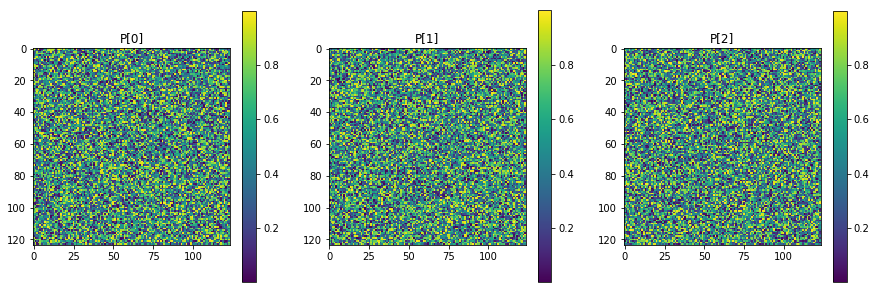

In [69]:
# polarizance_vector
M = Mueller()
mat = np.random.rand(4, 4, 124, 124)
mat[0,0,:] = 1
M.from_matrix(mat)
_ = M.parameters.polarizance_vector(draw=True)

The small matrix of M is:
The mean value of param m[0,0] is 0.5037760951638504 +- 0.2882812764524644
The mean value of param m[0,1] is 0.49825226213531004 +- 0.2886481304937016
The mean value of param m[0,2] is 0.4993038820421767 +- 0.2876519766921012
The mean value of param m[1,0] is 0.5037317606077482 +- 0.287665407842948
The mean value of param m[1,1] is 0.5000525144594085 +- 0.2867451542784519
The mean value of param m[1,2] is 0.498645229529864 +- 0.28784126080261274
The mean value of param m[2,0] is 0.49919122228402 +- 0.2881309893353218
The mean value of param m[2,1] is 0.5000379701109429 +- 0.2890532364926544
The mean value of param m[2,2] is 0.5001198250902718 +- 0.287975906920769


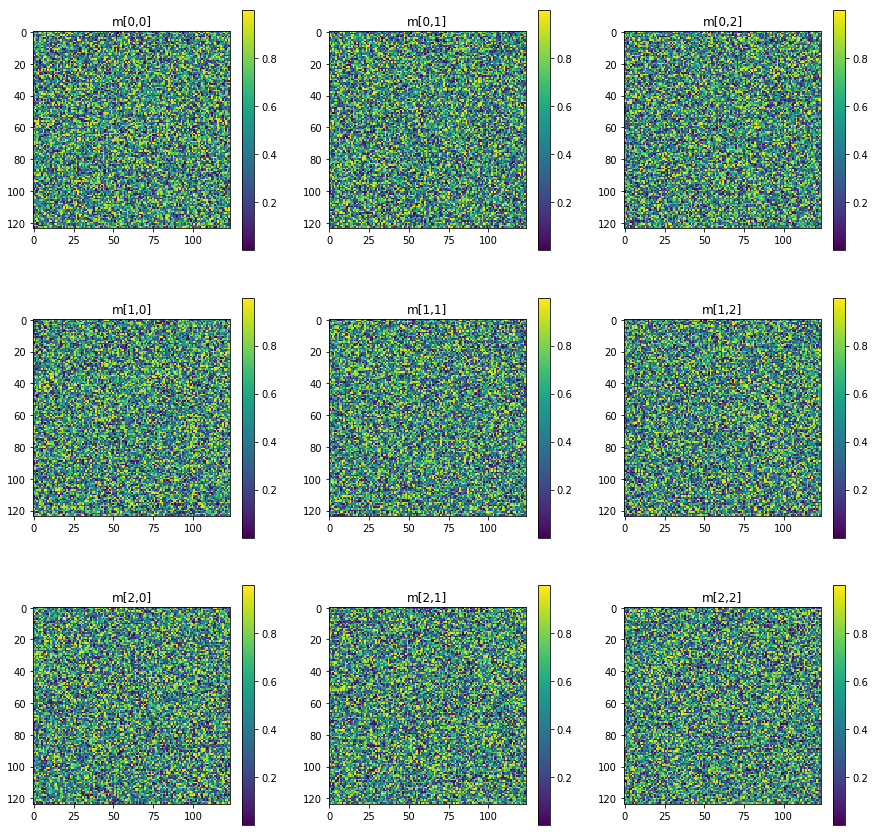

In [70]:
# small_matrix
M = Mueller()
mat = np.random.rand(4, 4, 124, 124)
mat[0,0,:] = 1
M.from_matrix(mat)
_ = M.parameters.small_matrix(draw=True)

The block components of M are:
  - M_00 of M is:
The mean value is 1.0 +- 0.0


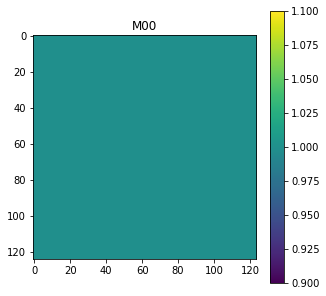


  - Diattenuation vector of M is:
The mean value of param D[0] is 0.5000631035798999 +- 0.28939733575528515
The mean value of param D[1] is 0.49568341514437475 +- 0.28810993500718146
The mean value of param D[2] is 0.498730973759547 +- 0.28925059718326124


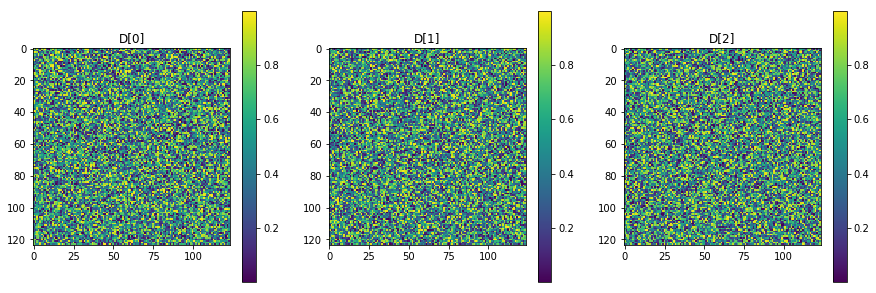


  - Polarizance vector of M is:
The mean value of param P[0] is 0.5031678827387109 +- 0.28951897288040257
The mean value of param P[1] is 0.49978400566887954 +- 0.2879636002595626
The mean value of param P[2] is 0.5002423574026172 +- 0.2897899128244004


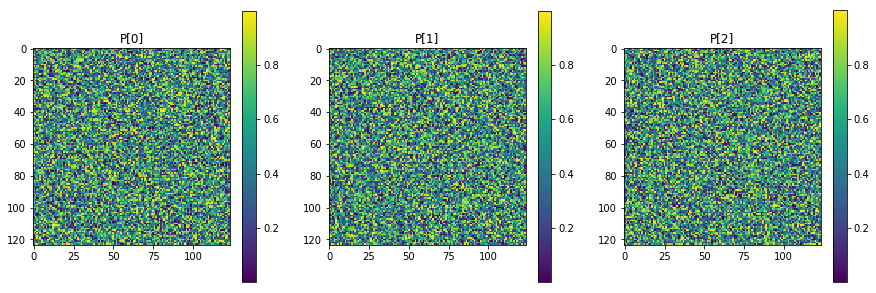


  - Small matrix of M is:
The mean value of param m[0,0] is 0.5021280500782109 +- 0.2882095498081859
The mean value of param m[0,1] is 0.501897823775156 +- 0.2896617726607494
The mean value of param m[0,2] is 0.5017115193206271 +- 0.28712659465064083
The mean value of param m[1,0] is 0.4986991804175475 +- 0.2880901994459931
The mean value of param m[1,1] is 0.5013071219294618 +- 0.28758623399244393
The mean value of param m[1,2] is 0.500921349425058 +- 0.289233140332088
The mean value of param m[2,0] is 0.49803407749760603 +- 0.2890578034390688
The mean value of param m[2,1] is 0.49854710495542526 +- 0.28946061798636036
The mean value of param m[2,2] is 0.497766348311522 +- 0.2892552955421516


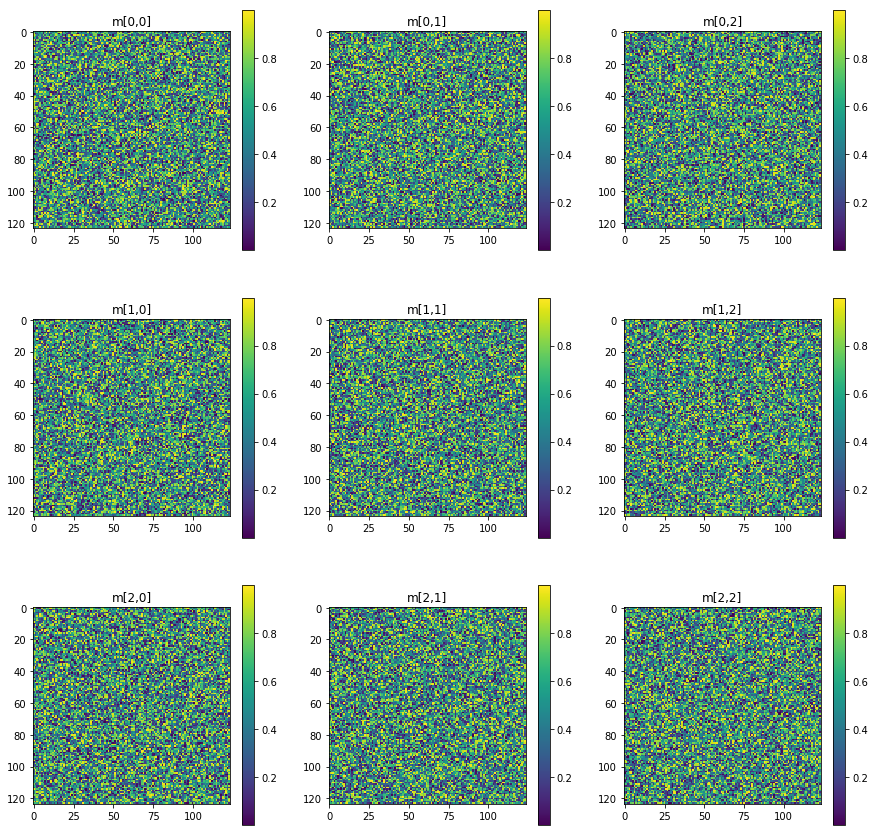

In [71]:
# blocks
M = Mueller()
mat = np.random.rand(4, 4, 124, 124)
mat[0,0,:] = 1
M.from_matrix(mat)
_ = M.parameters.blocks(draw=True)

M = 
[+0.530 +0.280 +0.000 +0.000]   
[+0.280 +0.530 +0.000 +0.000]   
[+0.000 +0.000 +0.450 +0.000]   
[+0.000 +0.000 +0.000 +0.450]   

The inhomogeneity parameter of M is:
0.0

The inhomogeneity parameter of M is:
The mean value is 0.0 +- 0.0


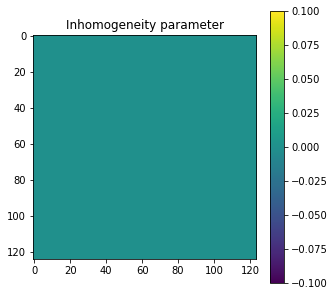

In [72]:
# inhomogeneity
M = Mueller()
M.diattenuator_linear(p1=0.9, p2=0.5)
print(M)
_ = M.parameters.inhomogeneity(verbose=True)

M = Mueller()
phase = np.random.rand(124, 124) * 360 * degrees
M.diattenuator_linear(p1=np.random.rand(124,124), p2=np.random.rand(124,124), global_phase=phase)
_ = M.parameters.inhomogeneity(draw=True)

The diattenuation of M is:
0.11724137931034477

The diattenuation of M is:
The mean value is 0.5716185551374121 +- 0.32159220319724


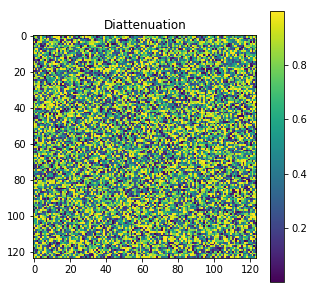

In [73]:
# diattenuation
M = Mueller()
M.diattenuator_linear(p1=0.9, p2=0.8)
_ = M.parameters.diattenuation(verbose=True)

M = Mueller()
N = 124
p1 = np.random.rand(N,N)
p2 = np.random.rand(N,N)
# print(p1, '\n', p2)
M.diattenuator_linear(p1=p1, p2=p2)
_ = M.parameters.diattenuation(draw=True)

The linear diattenuation of M is:
0.11724137931034477

The linear diattenuation of M is:
The mean value is 0.5721154447580993 +- 0.32262582401695944


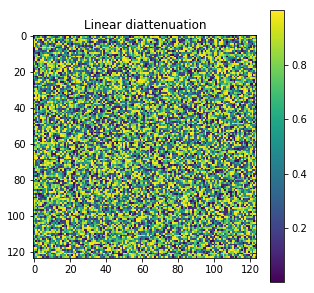

In [74]:
# diattenuation_linear
M = Mueller()
M.diattenuator_linear(p1=0.9, p2=0.8)
_ = M.parameters.diattenuation_linear(verbose=True)

M = Mueller()
N = 124
p1 = np.random.rand(N,N)
p2 = np.random.rand(N,N)
# print(p1, '\n', p2)
M.diattenuator_linear(p1=p1, p2=p2)
_ = M.parameters.diattenuation_linear(draw=True)

The circular diattenuation of M is:
0.0

The circular diattenuation of M is:
The mean value is 0.0 +- 0.0


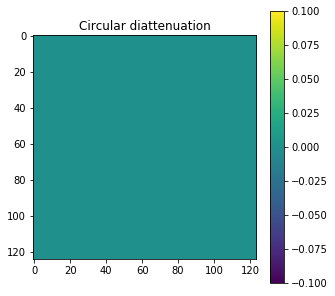

In [75]:
# diattenuation_circular
M = Mueller()
M.diattenuator_linear(p1=0.9, p2=0.8)
_ = M.parameters.diattenuation_circular(verbose=True)

M = Mueller()
N = 124
p1 = np.random.rand(N,N)
p2 = np.random.rand(N,N)
# print(p1, '\n', p2)
M.diattenuator_linear(p1=p1, p2=p2)
_ = M.parameters.diattenuation_circular(draw=True)

The polarizance of M is:
0.11724137931034477

The polarizance of M is:
The mean value is 0.572770125188474 +- 0.3208023480506758


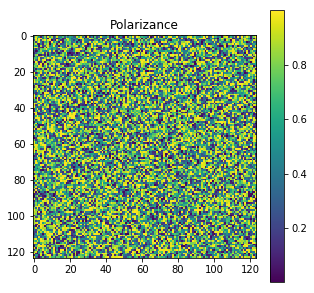

In [76]:
# polarizance
M = Mueller()
M.diattenuator_linear(p1=0.9, p2=0.8)
_ = M.parameters.polarizance(verbose=True)

M = Mueller()
N = 124
p1 = np.random.rand(N,N)
p2 = np.random.rand(N,N)
# print(p1, '\n', p2)
M.diattenuator_linear(p1=p1, p2=p2)
_ = M.parameters.polarizance(draw=True)

The linear polarizance of M is:
0.11724137931034477

The linear polarizance of M is:
The mean value is 0.5727094390509356 +- 0.3208132494308323


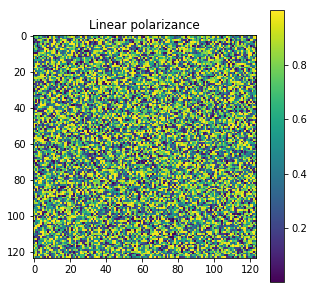

In [77]:
# polarizance_linear
M = Mueller()
M.diattenuator_linear(p1=0.9, p2=0.8)
_ = M.parameters.polarizance_linear(verbose=True)

M = Mueller()
N = 124
p1 = np.random.rand(N,N)
p2 = np.random.rand(N,N)
# print(p1, '\n', p2)
M.diattenuator_linear(p1=p1, p2=p2)
_ = M.parameters.polarizance_linear(draw=True)

The circular polarizance of M is:
0.0

The circular polarizance of M is:
The mean value is 0.0 +- 0.0


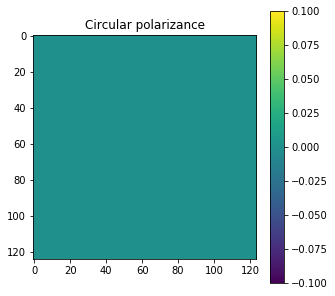

In [78]:
# polarizance_circular
M = Mueller()
M.diattenuator_linear(p1=0.9, p2=0.8)
_ = M.parameters.polarizance_circular(verbose=True)

M = Mueller()
N = 124
p1 = np.random.rand(N,N)
p2 = np.random.rand(N,N)
# print(p1, '\n', p2)
M.diattenuator_linear(p1=p1, p2=p2)
_ = M.parameters.polarizance_circular(draw=True)

The degree of polarizance of M is:
0.11724137931034477

The degree of polarizance of M is:
The mean value is 0.5700355357146681 +- 0.31934635806361567


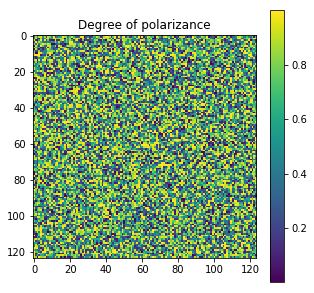

In [79]:
# degree_polarizance
M = Mueller()
M.diattenuator_linear(p1=0.9, p2=0.8)
_ = M.parameters.degree_polarizance(verbose=True)

M = Mueller()
N = 124
p1 = np.random.rand(N,N)
p2 = np.random.rand(N,N)
# print(p1, '\n', p2)
M.diattenuator_linear(p1=p1, p2=p2)
_ = M.parameters.degree_polarizance(draw=True)

The degree of spherical purity of M is:
0.9954076079601455

The degree of spherical purity of M is:
The mean value is 0.8305426306369194 +- 0.14765751566921745


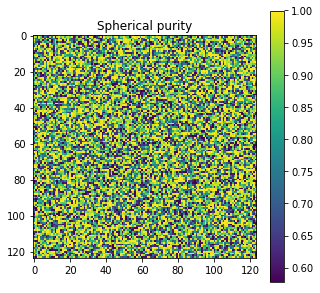

In [80]:
# spheric_purity
M = Mueller()
M.diattenuator_linear(p1=0.9, p2=0.8)
_ = M.parameters.spheric_purity(verbose=True)

M = Mueller()
N = 124
p1 = np.random.rand(N,N)
p2 = np.random.rand(N,N)
# print(p1, '\n', p2)
M.diattenuator_linear(p1=p1, p2=p2)
_ = M.parameters.spheric_purity(draw=True)

The retardance of M is:
1.5707963267948966

The retardance of M is:
The mean value is 1.5710688980745018 +- 0.9124794261910893


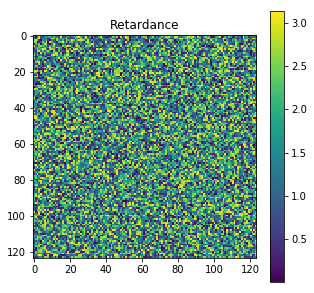


1.8951311264374816e-12


In [81]:
# retardance
M = Mueller()
M.retarder_linear(R=90*degrees)
_ = M.parameters.retardance(verbose=True)

M = Mueller()
N = 124
R = np.random.rand(N,N) * 180*degrees
M.retarder_linear(R=R)
_ = M.parameters.retardance(draw=True)
print(np.linalg.norm(R-_))

The eigenvalues of M are:
  v1
0.81
  v2
0.25
  v3
0.45
  v4
0.45

The eigenvectors of M are:
  e1 I
[0.7071]
  e1 Q
[0.7071]
  e1 U
[0.]
  e1 V
[0.]
  e2 I
[-0.7071]
  e2 Q
[0.7071]
  e2 U
[0.]
  e2 V
[0.]
  e3 I
[0.]
  e3 Q
[0.]
  e3 U
[1.]
  e3 V
[0.]
  e4 I
[0.]
  e4 Q
[0.]
  e4 U
[0.]
  e4 V
[1.]

The eigenvalues of M are:
The mean value of param v1 is 0.6555411030176901 +- 0.2502787075504062
The mean value of param v2 is 0.40445889698231013 +- 0.2502787075504063
The mean value of param v3 is 0.45000000000000007 +- 9.38924331535911e-17
The mean value of param v4 is 0.4500000000000002 +- 1.6653345369377348e-16


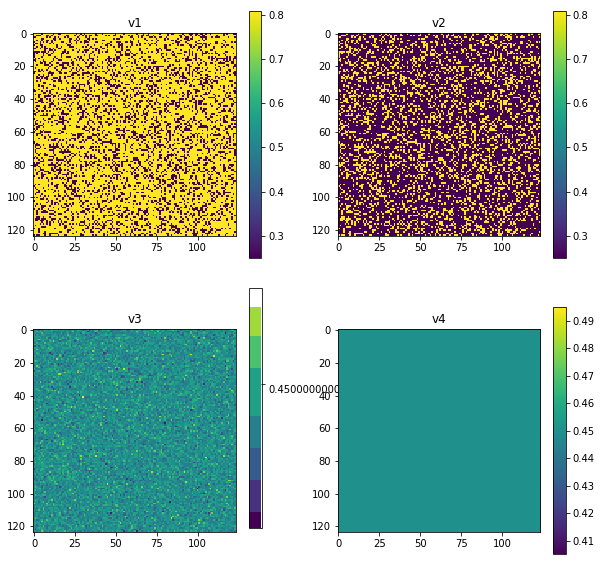


The eigenvectors of M are:
The mean value of param e1 I is 0.2017020253826872 +- 0.6777287753640994
The mean value of param e1 Q is 0.31902326606047027 +- 0.31999195923734497
The mean value of param e1 U is 0.3876191346300722 +- 0.3815504006080843
The mean value of param e1 V is 0.0 +- 0.0
The mean value of param e2 I is 0.3987133059890327 +- 0.5839757697261899
The mean value of param e2 Q is -0.11091029160126126 +- 0.43802922902629177
The mean value of param e2 U is -0.07642018366391444 +- 0.5385065062414096
The mean value of param e2 V is 0.0 +- 0.0
The mean value of param e3 I is 3.798867848767834e-19 +- 3.097693089552745e-16
The mean value of param e3 Q is -0.2944614811026573 +- 0.7105990709379943
The mean value of param e3 U is 0.5475204932414153 +- 0.3294885521676982
The mean value of param e3 V is 0.0 +- 0.0
The mean value of param e4 I is 0.0 +- 0.0
The mean value of param e4 Q is 0.0 +- 0.0
The mean value of param e4 U is 0.0 +- 0.0
The mean value of param e4 V is 1.0 +- 0.0


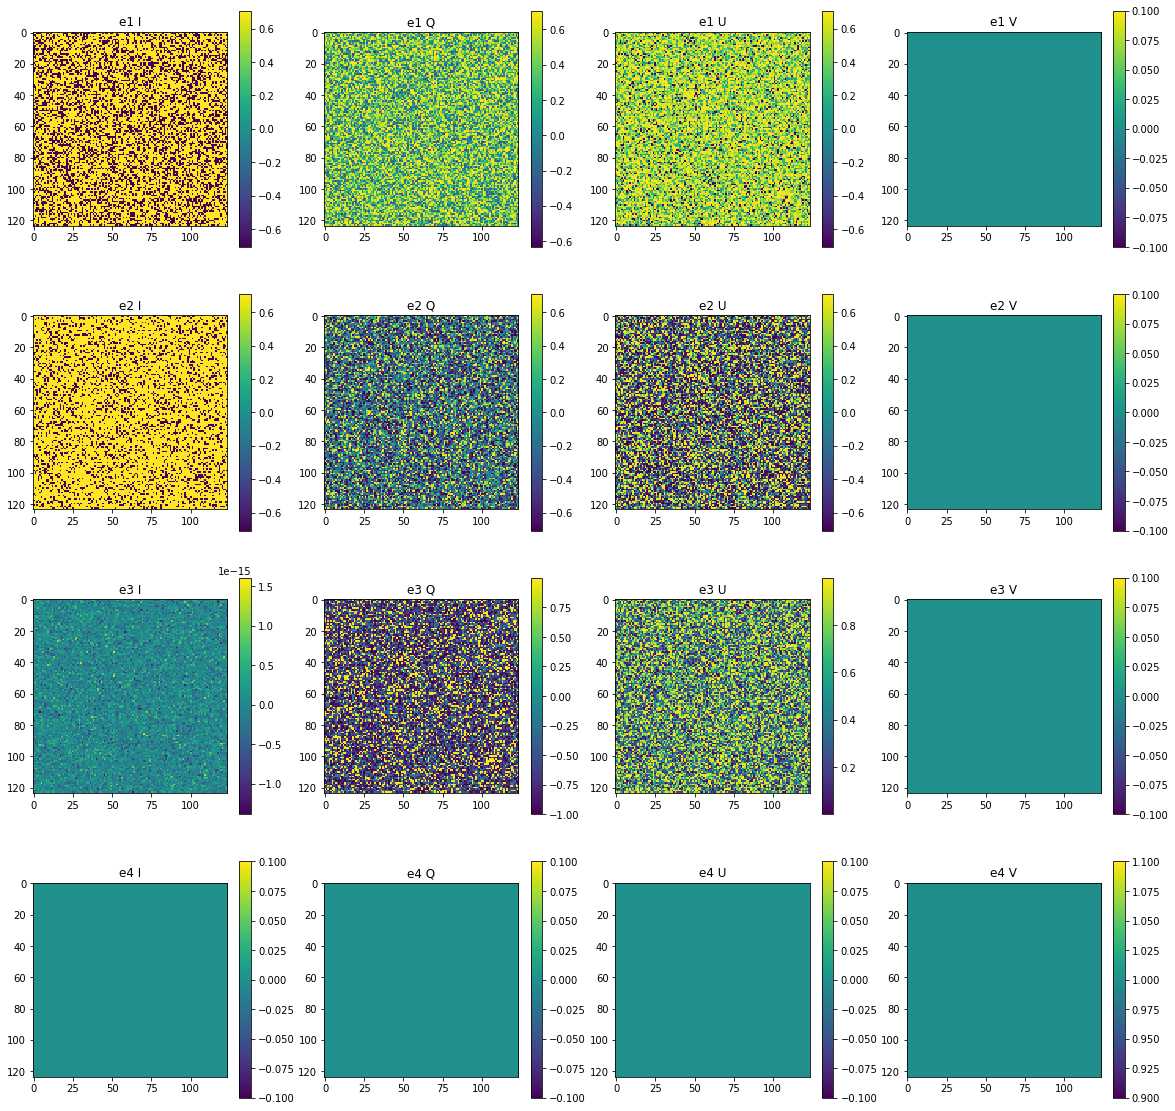


(4, 124, 124)
(4, 124, 124)
(4, 124, 124)
(4, 124, 124)


In [82]:
# eig
M = Mueller()
M.diattenuator_linear(0.9,0.5)
val, vect = M.parameters.eig(verbose=True)

M = Mueller()
N=124
angles = np.random.rand(N,N)
M.diattenuator_linear(0.9,0.5, azimuth=angles)
val, vect = M.parameters.eig(draw=True)
for elem in vect:
    print(elem.shape)

In [83]:
# eig
M = Mueller()
M.diattenuator_linear(0.9,0.5)
val, vect = M.parameters.eig(values_as_matrix=True, vectors_as_matrix=True)
print(val.shape, vect.shape)

M = Mueller()
N=124
angles = np.random.rand(N,N)
M.diattenuator_linear(0.9,0.5, azimuth=angles)
val, vect = M.parameters.eig(values_as_matrix=True, vectors_as_matrix=True)
print(val.shape, vect.shape)

(4, 1) (4, 4, 1)
(4, 124, 124) (4, 4, 124, 124)


The eigenvalues of M are:
  v1
0.81
  v2
0.25
  v3
0.45
  v4
0.45

(0.81, 0.25, 0.45, 0.45)
The eigenvalues of M are:
The mean value of param v1 is 0.6551040582726327 +- 0.2504974542859023
The mean value of param v2 is 0.40489594172736737 +- 0.2504974542859024
The mean value of param v3 is 0.45000000000000007 +- 9.468417854216093e-17
The mean value of param v4 is 0.4500000000000002 +- 1.6653345369377348e-16


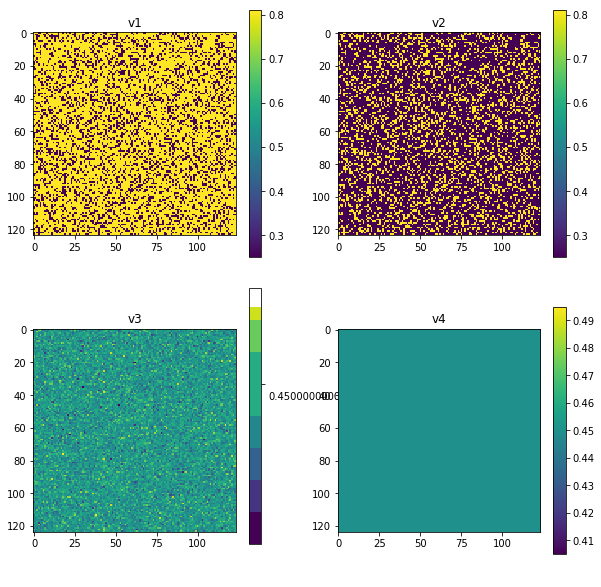

In [84]:
# eigenvalues
M = Mueller()
M.diattenuator_linear(0.9,0.5)
val = M.parameters.eigenvalues(verbose=True)
print(val)

M = Mueller()
N=124
angles = np.random.rand(N,N)
M.diattenuator_linear(0.9,0.5, azimuth=angles)
val = M.parameters.eigenvalues(draw=True)

The eigenvectors of M are:
  e1 I
[0.7071]
  e1 Q
[0.7071]
  e1 U
[0.]
  e1 V
[0.]
  e2 I
[-0.7071]
  e2 Q
[0.7071]
  e2 U
[0.]
  e2 V
[0.]
  e3 I
[0.]
  e3 Q
[0.]
  e3 U
[1.]
  e3 V
[0.]
  e4 I
[0.]
  e4 Q
[0.]
  e4 U
[0.]
  e4 V
[1.]

The eigenvectors of M are:
The mean value of param e1 I is 0.19563164978977457 +- 0.6795058922485743
The mean value of param e1 Q is 0.31620248479215074 +- 0.32204466470858056
The mean value of param e1 U is 0.3899111686606028 +- 0.3798322038713021
The mean value of param e1 V is 0.0 +- 0.0
The mean value of param e2 I is 0.3938386104371483 +- 0.5872743387284481
The mean value of param e2 Q is -0.10747799100047259 +- 0.43834376795672
The mean value of param e2 U is -0.07113305867543752 +- 0.5396696308923491
The mean value of param e2 V is 0.0 +- 0.0
The mean value of param e3 I is -4.504101859228661e-19 +- 3.124319678272183e-16
The mean value of param e3 Q is -0.2822474874886892 +- 0.7162002519507638
The mean value of param e3 U is 0.5468544059134464 +-

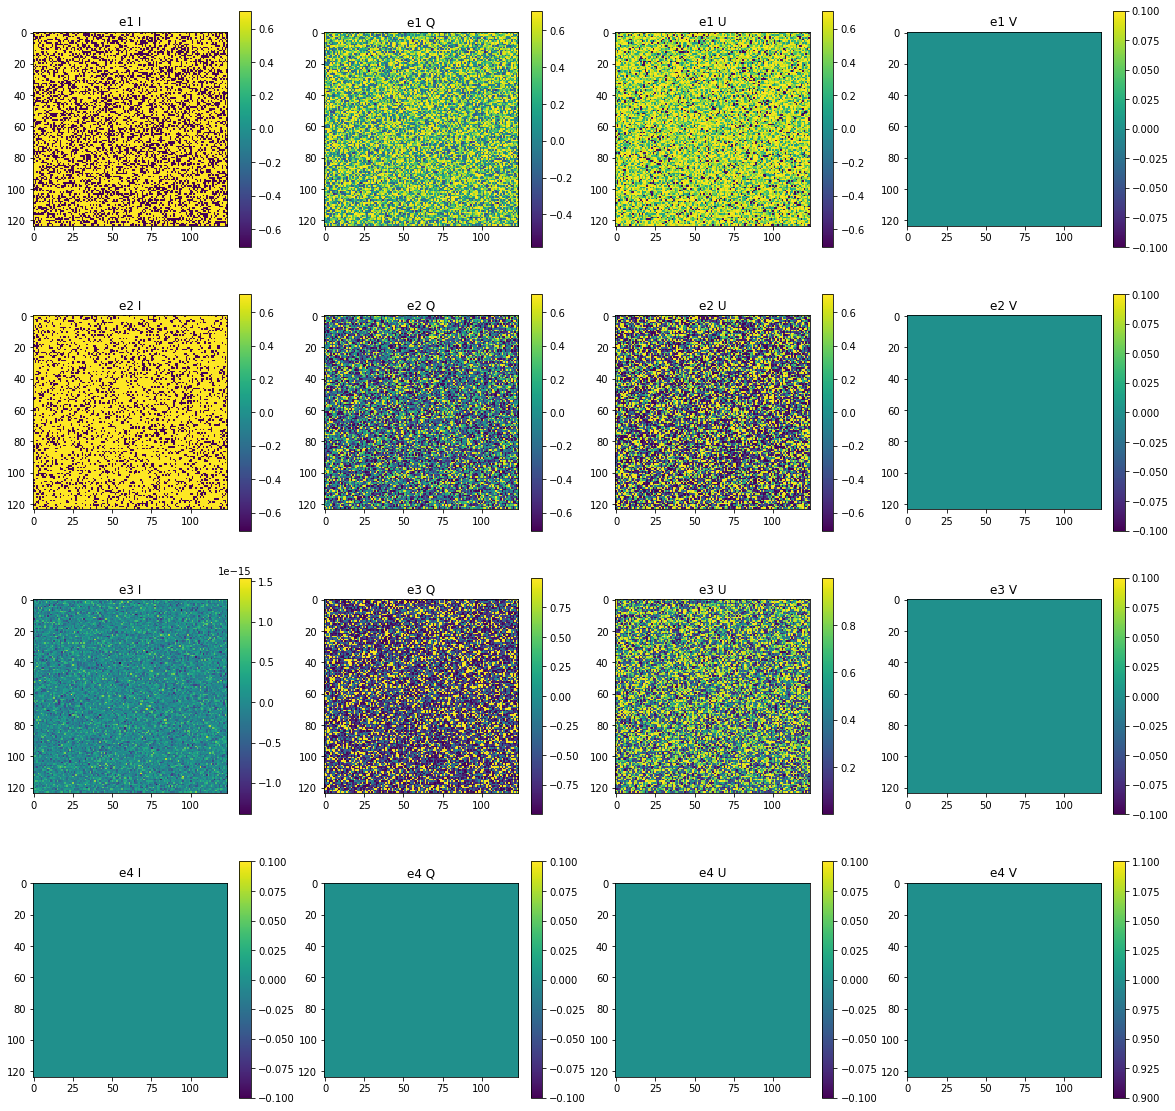

In [85]:
# eigenvectors
M = Mueller()
M.diattenuator_linear(0.9,0.5)
val = M.parameters.eigenvectors(verbose=True)

M = Mueller()
N=124
angles = np.random.rand(N,N)
M.diattenuator_linear(0.9,0.5, azimuth=angles)
vect = M.parameters.eigenvectors(draw=True)

In [86]:
a = np.random.rand(5,2,2)
print(a)
b = np.array([a[:,0,0], a[:,1,0]])
print(b.shape)
c = a[:,0:,0]
print(c.shape)

[[[0.1182 0.423 ]
  [0.8484 0.8905]]

 [[0.3381 0.3041]
  [0.3288 0.9494]]

 [[0.05   0.9693]
  [0.7651 0.0544]]

 [[0.5028 0.4147]
  [0.9216 0.3065]]

 [[0.2008 0.8874]
  [0.5355 0.7669]]]
(2, 5)
(5, 2)


In [87]:
M = Mueller()
M.diattenuator_linear(0.9,0.5)
vect = M.parameters.eigenvectors(vectors_as_matrix=True)
print(vect.shape)

M = Mueller()
N=124
angles = np.random.rand(N,N)
M.diattenuator_linear(0.9,0.5, azimuth=angles)
vect = M.parameters.eigenvectors(vectors_as_matrix=True)
print(vect.shape)

(4, 4, 1)
(4, 4, 124, 124)


d:\codigo_ucm\py_pol\py_pol\jones_matrix.py:513: ComplexWarning: Casting complex values to real discards the imaginary part
  self.M = np.array(self.M, dtype=float)


The eigenstates of M are:
  S1 I
1.0
  S1 Q
-1.0
  S1 U
0.0
  S1 V
-0.0
  S2 I
1.0
  S2 Q
1.0
  S2 U
0.0
  S2 V
-0.0

The eigenstates of M are:
The mean value of param S1 I is 1.0 +- 1.4976571345165623e-16
The mean value of param S1 Q is -0.45073253791548035 +- 0.4478476789992204
The mean value of param S1 U is -0.7089421956062785 +- 0.3060614300565011
The mean value of param S1 V is 0.0 +- 0.0
The mean value of param S2 I is 1.0 +- 1.4976571345165623e-16
The mean value of param S2 Q is 0.45073253791548035 +- 0.4478476789992204
The mean value of param S2 U is 0.7089421956062785 +- 0.3060614300565011
The mean value of param S2 V is 0.0 +- 0.0


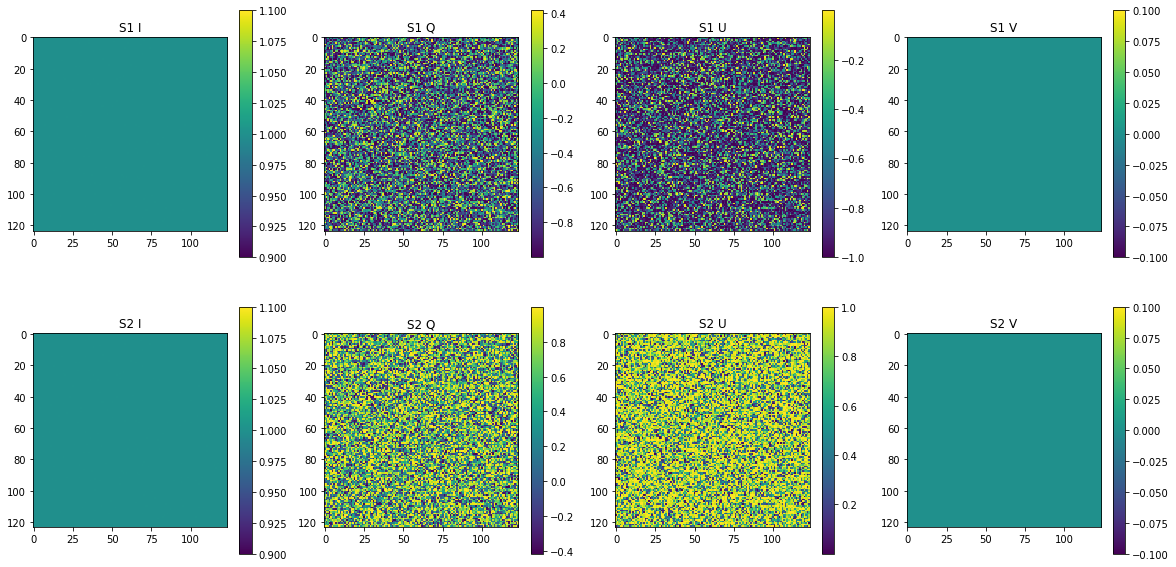

In [88]:
# eigenstates
M = Mueller()
M.diattenuator_linear(0.9,0.5)
val = M.parameters.eigenstates(verbose=True)

M = Mueller()
N=124
angles = np.random.rand(N,N)
M.diattenuator_linear(0.9,0.5, azimuth=angles)
vect = M.parameters.eigenstates(draw=True)

The transmissions of M are:
  Maximum
0.8099999999999999
  Minimum
0.25

The transmissions of M are:
The mean value of param Maximum is 0.81 +- 1.0342256097088707e-16
The mean value of param Minimum is 0.25 +- 2.5363609911654436e-17


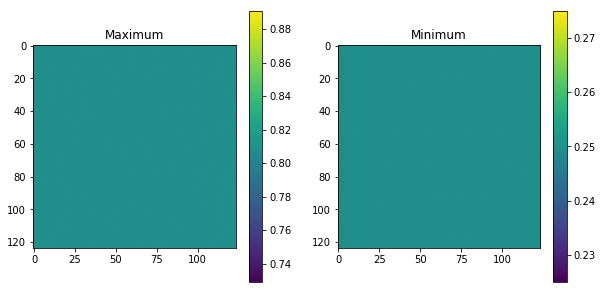

In [89]:
# eigenstates
M = Mueller()
M.diattenuator_linear(0.9,0.5)
val = M.parameters.transmissions(verbose=True)

M = Mueller()
N=124
angles = np.random.rand(N,N)
M.diattenuator_linear(0.9,0.5, azimuth=angles)
vect = M.parameters.transmissions(draw=True)

The retardance vector (norm) components components of M are:
  r0
[-1.]
  r1
[0.]
  r2
[-0.]



d:\codigo_ucm\py_pol\py_pol\jones_vector.py:455: ComplexWarning: Casting complex values to real discards the imaginary part
  self.M = np.array(self.M, dtype=float)


The retardance vector (norm) components components of M are:
The mean value of param r0 is -0.012313252524700107 +- 0.7066163874856244
The mean value of param r1 is 0.0032569004440678455 +- 0.49926128158704397
The mean value of param r2 is 0.004348875370423008 +- 0.5012487579432007


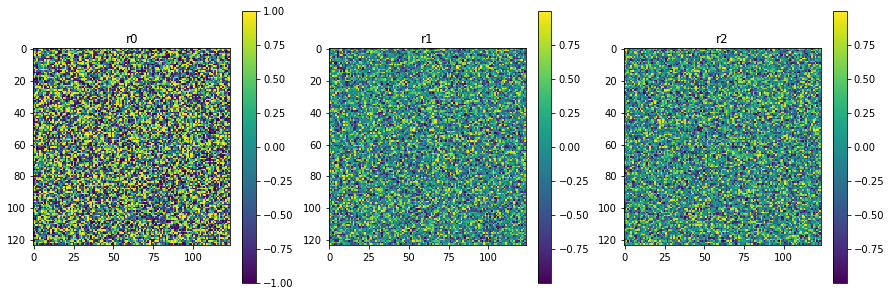

In [90]:
# retardance_vector
M = Mueller()
M.half_waveplate()
_ = M.parameters.retardance_vector(verbose=True)

N = 124
alpha = np.random.rand(N,N) * 90*degrees
delay = np.random.rand(N,N) * 360*degrees
M.retarder_charac_angles(R=90*degrees, alpha=alpha, delay=delay)
_ = M.parameters.retardance_vector(draw=True)

The degree of polarimetric purity of M is:
1.0

The degree of polarimetric purity of M is:
The mean value is 1.0 +- 7.45018529403474e-17


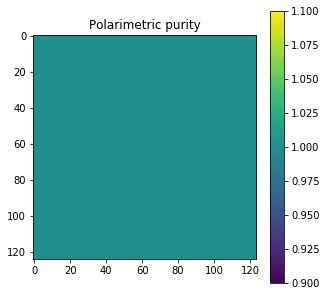

In [91]:
# polarimetric_purity
M = Mueller()
M.diattenuator_linear(p1=0.9, p2=0.8)
_ = M.parameters.polarimetric_purity(verbose=True)

M = Mueller()
N = 124
p1 = np.random.rand(N,N)
p2 = np.random.rand(N,N)
# print(p1, '\n', p2)
M.diattenuator_linear(p1=p1, p2=p2)
_ = M.parameters.polarimetric_purity(draw=True)

The depolarization index of M is:
0.0

The depolarization index of M is:
The mean value is nan +- nan


d:\codigo_ucm\py_pol\py_pol\mueller.py:3577: RuntimeWarning: invalid value encountered in sqrt
  DI = sqrt(1. - PP**2)


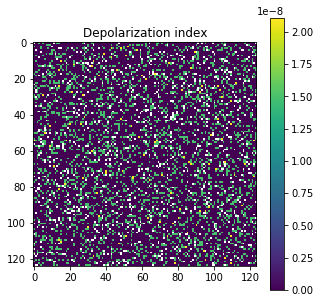

In [92]:
# depolarization_index
M = Mueller()
M.diattenuator_linear(p1=0.9, p2=0.8)
_ = M.parameters.depolarization_index(verbose=True)

M = Mueller()
N = 124
p1 = np.random.rand(N,N)
p2 = np.random.rand(N,N)
# print(p1, '\n', p2)
M.diattenuator_linear(p1=p1, p2=p2)
_ = M.parameters.depolarization_index(draw=True)

The polarimetric purity indices of M are:
  P1
0.9999999999999999
  P2
0.9999999999999999
  P3
0.9999999999999999

The polarimetric purity indices of M are:
The mean value of param P1 is 1.0 +- 2.458685698380979e-16
The mean value of param P2 is 1.0 +- 2.481807498792184e-16
The mean value of param P3 is 1.0 +- 2.48093523250557e-16


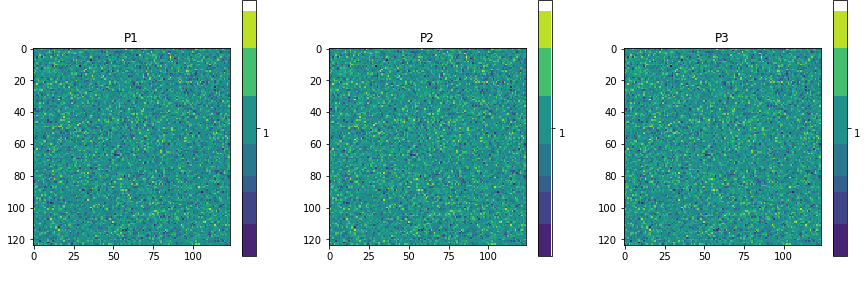

In [93]:
# polarimetric_purity_indices
M = Mueller()
M.diattenuator_linear(p1=0.9, p2=0.8)
_ = M.parameters.polarimetric_purity_indices(verbose=True)

M = Mueller()
N = 124
p1 = np.random.rand(N,N)
p2 = np.random.rand(N,N)
# print(p1, '\n', p2)
M.diattenuator_linear(p1=p1, p2=p2)
_ = M.parameters.polarimetric_purity_indices(draw=True)

In [94]:
# get
M = Mueller()
M.from_matrix(np.random.rand(4,4,5,6))
mat = M.get()
print(mat.shape)

(4, 4, 5, 6)


## Checks

M is physically realizable:
True

M is physically realizable:
The mean value is 1.0 +- 0.0


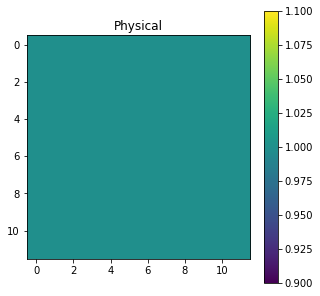

In [95]:
# is_physical
M = Mueller()
M.diattenuator_linear()
_ = M.checks.is_physical(verbose=True)

N = 12
p2 = np.random.rand(N,N)
M.diattenuator_linear(p2=p2)
_ = M.checks.is_physical(draw=True)

M is physically realizable:
The mean value of param Physical is 1.0 +- 0.0
The mean value of param Real elements is 1.0 +- 0.0
The mean value of param M00 >= 0 is 1.0 +- 0.0
The mean value of param M00 <= 1 is 1.0 +- 0.0
The mean value of param abs(Mij) <= M00 is 1.0 +- 0.0
The mean value of param D <= 1 is 1.0 +- 0.0
The mean value of param P <= 1 is 1.0 +- 0.0
The mean value of param Tmax <= 1 is 1.0 +- 0.0
The mean value of param Recip Tmax <= 1 is 1.0 +- 0.0
The mean value of param Tr(M*M^T) <= 4*M00^2 is 1.0 +- 0.0
The mean value of param m cond (D) is 1.0 +- 0.0
The mean value of param m cond (P) is 1.0 +- 0.0
The mean value of param Real eigenvalues is 1.0 +- 0.0
The mean value of param Eigenvalues >= 0 is 1.0 +- 0.0
The mean value of param Eigenvalues <= 1 is 1.0 +- 0.0


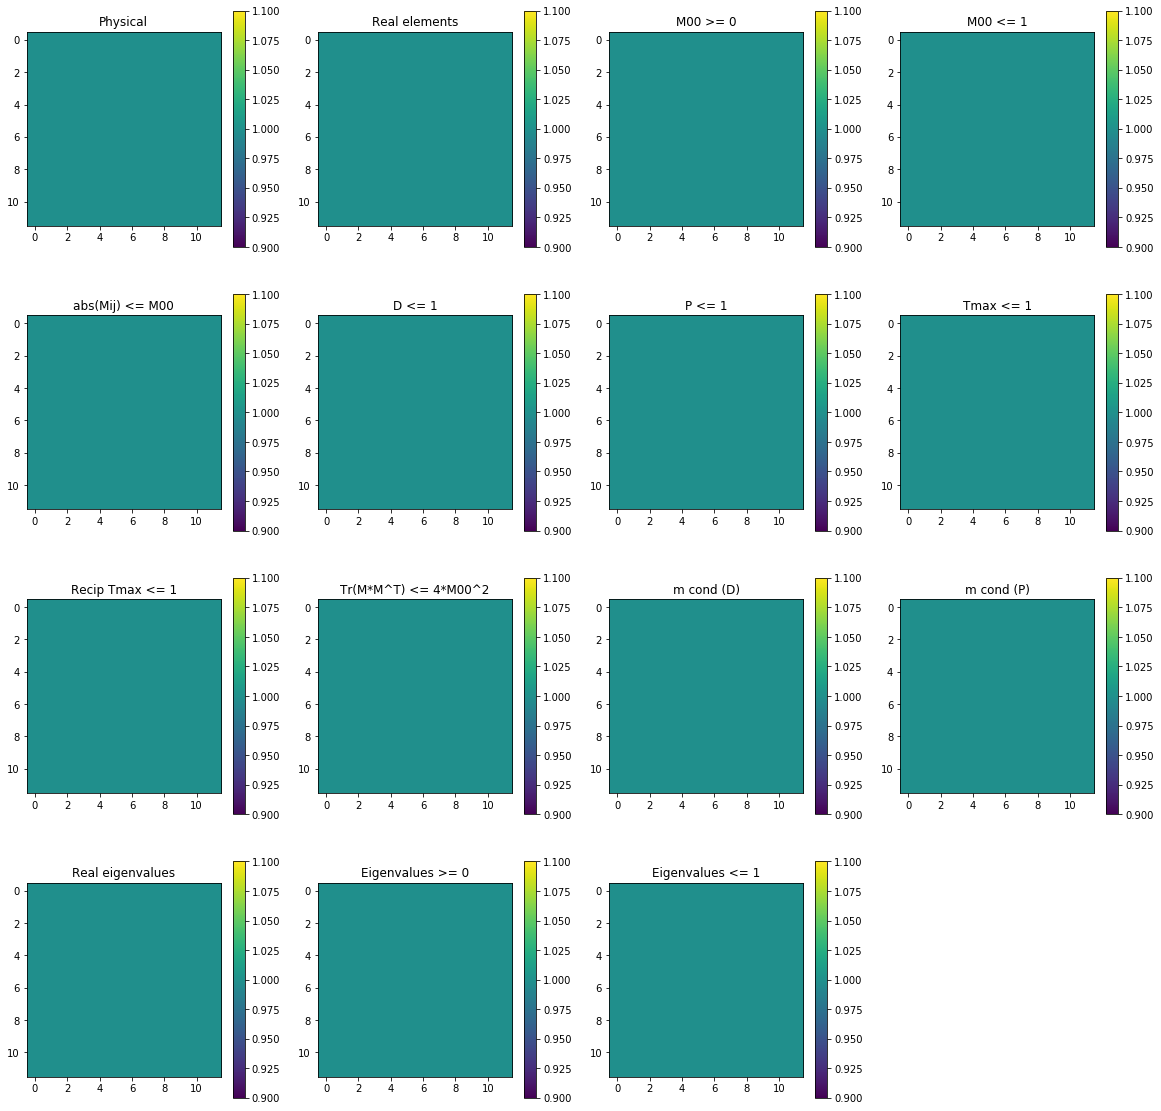

In [97]:
M = Mueller()
N = 12
p2 = np.random.rand(N,N)
M.diattenuator_linear(p2=p2)
_ = M.checks.is_physical(draw=True, give_all=True)

M is pure (non-depolarizing):
True

M is pure (non-depolarizing):
The mean value is 1.0 +- 0.0


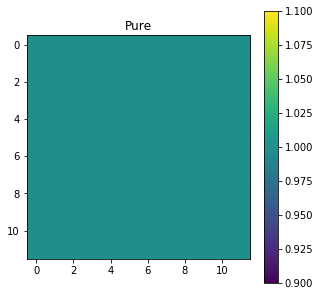

In [98]:
# is_non_depolarizing
M = Mueller()
M.diattenuator_linear()
_ = M.checks.is_non_depolarizing(verbose=True)

N = 12
p2 = np.random.rand(N,N)
M.diattenuator_linear(p2=p2)
_ = M.checks.is_non_depolarizing(draw=True)

M is homogeneous:
True

M is homogeneous:
The mean value is 1.0 +- 0.0


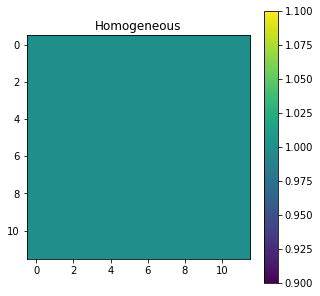

In [99]:
# is_homogeneous
M = Mueller()
M.diattenuator_linear()
_ = M.checks.is_homogeneous(verbose=True)

N = 12
p2 = np.random.rand(N,N)
M.diattenuator_linear(p2=p2)
_ = M.checks.is_homogeneous(draw=True)

M is a retarder:
True

M is a retarder:
The mean value is 0.0 +- 0.0


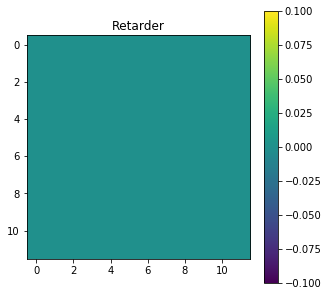

In [100]:
# is_retarder
M = Mueller()
M.retarder_linear(R=30*degrees)
_ = M.checks.is_retarder(verbose=True)

N = 12
p2 = np.random.rand(N,N)
M.diattenuator_linear(p2=p2)
_ = M.checks.is_retarder(draw=True)

d:\codigo_ucm\py_pol\py_pol\mueller.py:6222: RuntimeWarning: invalid value encountered in true_divide
  (1, Dv[0, :] / par, Dv[1, :] / par, Dv[2, :] / par))
d:\codigo_ucm\py_pol\py_pol\mueller.py:6224: RuntimeWarning: invalid value encountered in true_divide
  (1, -Dv[0, :] / par, -Dv[1, :] / par, -Dv[2, :] / par))


M is a diattenuator:
[False]

M is a diattenuator:
The mean value is 1.0 +- 0.0


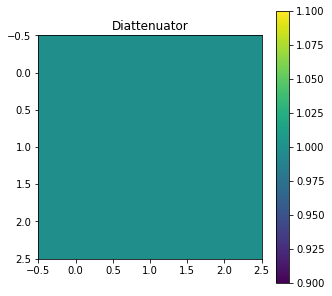

In [101]:
# is_diattenuator
M = Mueller()
M.retarder_linear(R=30*degrees)
_ = M.checks.is_diattenuator(verbose=True)

N = 3
p2 = np.random.rand(N,N)
M.diattenuator_linear(p2=p2)
_ = M.checks.is_diattenuator(draw=True)

M is singular:
False

M is singular:
The mean value is 0.0 +- 0.0


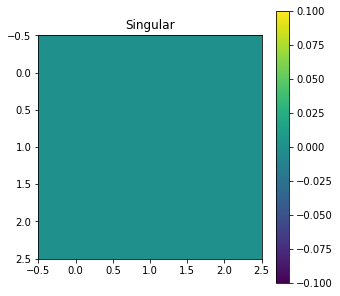

In [102]:
# is_singular
M = Mueller()
M.retarder_linear(R=30*degrees)
_ = M.checks.is_singular(verbose=True)

N = 3
p2 = np.random.rand(N,N)
M.diattenuator_linear(p2=p2)
_ = M.checks.is_singular(draw=True)

## Analysis

In [103]:
# filter_purify_number
M = np.array([[1, -0.0229, 0.0027, 0.0058], [-0.0186, 0.9956, -0.0361, 0.0318], [-0.0129, 0.0392, 0.2207, -0.9656], [0.0014, 0.028, 0.9706, 0.2231]])
M1 = Mueller()
M1.from_matrix(M)
print(M1)
# H = M1.covariance_matrix(keep=True)
# print(H)
# M_test = Mueller()
# M_test.from_covariance(H)
# print(np.linalg.norm(M1.M-M_test.M))
M2 = M1.analysis.filter_purify_number(Neig=3, keep=True)
print(M2)
# H2 = M2.covariance_matrix(keep=True)
# l = H2.parameters.eigenvalues(verbose=True)

M = 
[+1.000 -0.023 +0.003 +0.006]   
[-0.019 +0.996 -0.036 +0.032]   
[-0.013 +0.039 +0.221 -0.966]   
[+0.001 +0.028 +0.971 +0.223]   

Covariant of M = 
[+0.996 -0.021 +0.001 +0.009]   
[-0.021 +0.995 -0.036 +0.032]   
[-0.009 +0.039 +0.222 -0.970]   
[+0.002 +0.028 +0.970 +0.223]   



d:\codigo_ucm\py_pol\py_pol\mueller.py:1483: ComplexWarning: Casting complex values to real discards the imaginary part
  np.array(elem.parameters.trace(shape=False), dtype=float)


In [104]:
M = np.random.rand(4,4,5,3)
M1 = Mueller()
M1.from_matrix(M)
print(M1.shape)
M2 = M1.analysis.filter_purify_number(Neig=3, keep=True)
print(M2.shape)

[5, 3]
[5, 3]


In [105]:
# filter_purify_threshold
M = np.array([[1, -0.0229, 0.0027, 0.0058], [-0.0186, 0.9956, -0.0361, 0.0318], [-0.0129, 0.0392, 0.2207, -0.9656], [0.0014, 0.028, 0.9706, 0.2231]])
M1 = Mueller()
M1.from_matrix(M)
print(M1)
M2 = M1.analysis.filter_purify_threshold(threshold=0.01, keep=True)
print(M2)

M = 
[+1.000 -0.023 +0.003 +0.006]   
[-0.019 +0.996 -0.036 +0.032]   
[-0.013 +0.039 +0.221 -0.966]   
[+0.001 +0.028 +0.971 +0.223]   

Covariant of M = 
[+0.996 -0.021 +0.001 +0.009]   
[-0.021 +0.995 -0.036 +0.032]   
[-0.009 +0.039 +0.222 -0.970]   
[+0.002 +0.028 +0.970 +0.223]   



In [106]:
# filter_physical_conditions
M = np.random.rand(4,4)
M1 = Mueller()
M1.from_matrix(M)
print(M1)
M2 = M1.analysis.filter_physical_conditions(tol=1e-6, keep=True)
print(M2)

M = 
[+0.604 +0.436 +0.276 +0.482]   
[+0.593 +0.116 +0.716 +0.283]   
[+0.937 +0.193 +0.996 +0.305]   
[+0.656 +0.699 +0.257 +0.267]   

M = 
[+0.604 +0.436 +0.276 +0.482]   
[+0.593 +0.116 +0.604 +0.283]   
[+0.604 +0.193 +0.604 +0.305]   
[+0.604 +0.604 +0.257 +0.267]   



In [107]:
# filter_physical_conditions
M = np.random.rand(4,4,3,5)
M1 = Mueller()
M1.from_matrix(M)
print(M1.shape)
M2 = M1.analysis.filter_physical_conditions(tol=1e-6, keep=True)
print(M2.shape)

[3, 5]
[3, 5]


In [108]:
# diattenuator
N=1
p1 = np.random.rand(N)/2 + 0.5
p2 = np.random.rand(N)/2
azimuth = np.random.rand(N) * 180*degrees
ellipticity = np.random.rand(N) * 90*degrees - 45*degrees
print(p1, p2, azimuth/degrees, ellipticity/degrees)
M1 = Mueller()
M1.diattenuator_azimuth_ellipticity(p1=p1, p2=p2, azimuth=azimuth, ellipticity=ellipticity)
trans, angles = M1.analysis.diattenuator(verbose =True)

[0.7362] [0.0541] [14.0297] [-6.8708]

Analysis of M as diattenuator:

- Transmissions of M are:
  Max. transmission
0.5419833070638488
  Min. transmission
0.00293127702385731
  p1
0.7361951555558137
  p2
0.05414126913785186

- Angles of M are:
  Alpha
[15.4981]
  Delay
[332.5313]
  Azimuth
[14.0297]
  Ellipticity angle
[-6.8708]




Analysis of M as diattenuator:

- Transmissions of M are:
The mean value of param Max. transmission is 0.6091634969735578 +- 0.2170696375611575
The mean value of param Min. transmission is 0.0817197753937291 +- 0.07299402043109195
The mean value of param p1 is 0.7672879261037282 +- 0.14294311955808647
The mean value of param p2 is 0.24783199193418864 +- 0.14247483696309798


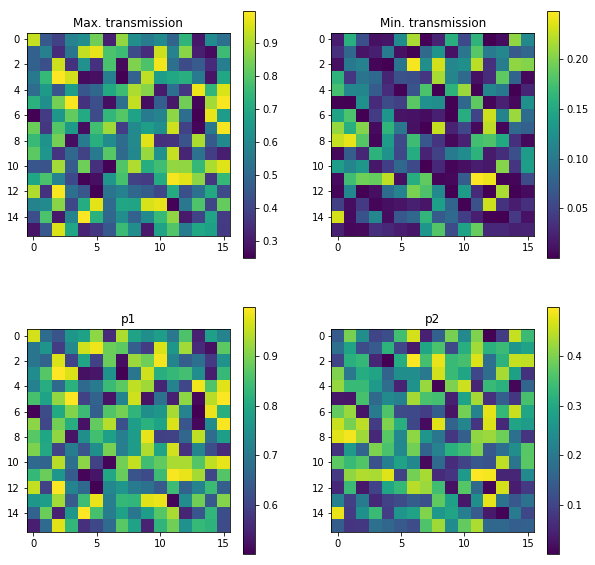


- Angles of M are:
The mean value of param Alpha is 43.75797180080921 +- 17.379529263922265
The mean value of param Delay is 183.5871925470519 +- 98.4325198821828
The mean value of param Azimuth is 89.70224282755203 +- 53.112895133051055
The mean value of param Ellipticity angle is -2.1149447970592914 +- 26.618480026380162


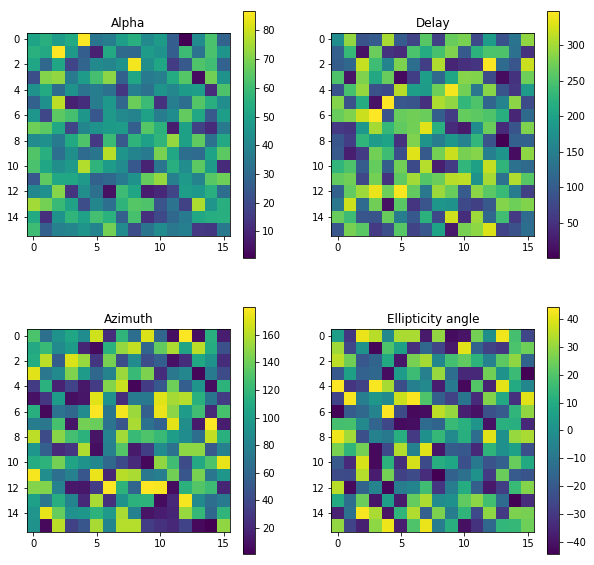

In [109]:
# diattenuator
N=16
p1 = np.random.rand(N,N)/2 + 0.5
p2 = np.random.rand(N,N)/2
azimuth = np.random.rand(N,N) * 180*degrees
ellipticity = np.random.rand(N,N) * 90*degrees - 45*degrees
M1 = Mueller()
M1.diattenuator_azimuth_ellipticity(p1=p1, p2=p2, azimuth=azimuth, ellipticity=ellipticity)
trans, angles = M1.analysis.diattenuator(draw =True)

In [110]:
# polarizer
N=1
p1 = np.random.rand(N)/2 + 0.5
p2 = np.random.rand(N)/2
azimuth = np.random.rand(N) * 180*degrees
ellipticity = np.random.rand(N) * 90*degrees - 45*degrees
print(p1, p2, azimuth/degrees, ellipticity/degrees)
M1 = Mueller()
M1.diattenuator_azimuth_ellipticity(p1=p1, p2=p2, azimuth=azimuth, ellipticity=ellipticity)
trans, angles = M1.analysis.polarizer(verbose =True)

[0.8077] [0.1302] [91.21] [-21.6268]

Analysis of M as polarizer:

- Transmissions of M are:
  Max. transmission
0.652400317740094
  Min. transmission
0.016960216176171855
  p1
0.8077130169435763
  p2
0.13023139474094506

- Angles of M are:
  Alpha
[68.346]
  Delay
[267.4304]
  Azimuth
[91.21]
  Ellipticity angle
[-21.6268]




Analysis of M as polarizer:

- Transmissions of M are:
The mean value of param Max. transmission is 0.5729581711550997 +- 0.21387161681698302
The mean value of param Min. transmission is 0.08763020817080973 +- 0.0743550959139198
The mean value of param p1 is 0.7435095764666698 +- 0.1419566161101796
The mean value of param p2 is 0.26115667444823265 +- 0.13938220676237537


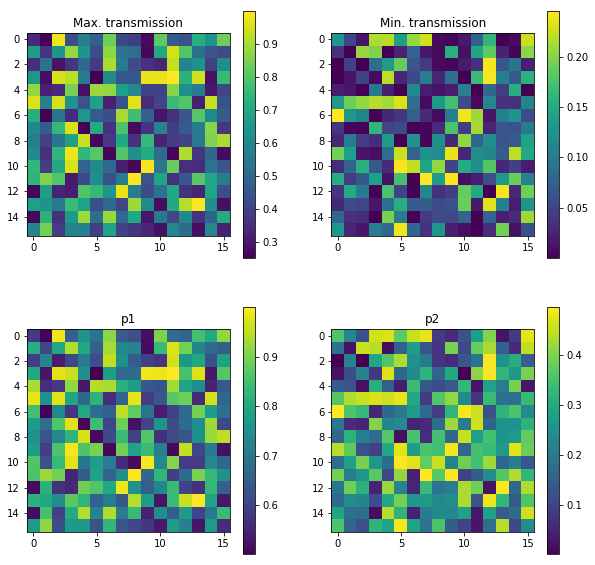


- Angles of M are:
The mean value of param Alpha is 45.019650882455856 +- 16.381030793872473
The mean value of param Delay is 190.1583541507964 +- 97.26819408230287
The mean value of param Azimuth is 94.60718479289709 +- 51.67330300932497
The mean value of param Ellipticity angle is -1.5904432742895913 +- 25.474416032916906


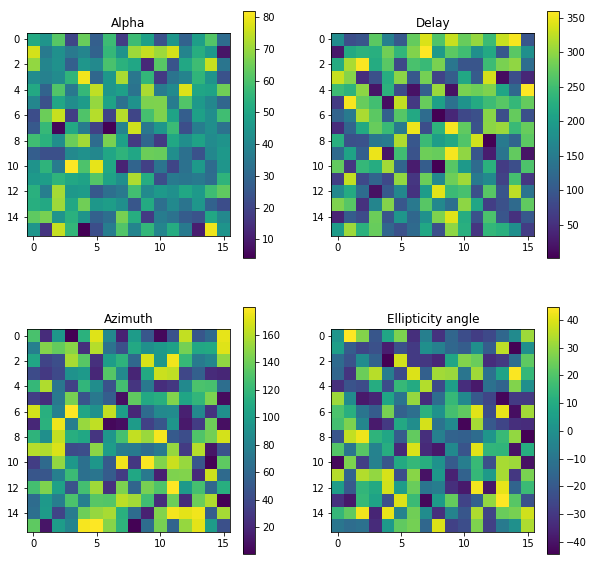

In [111]:
N=16
p1 = np.random.rand(N,N)/2 + 0.5
p2 = np.random.rand(N,N)/2
azimuth = np.random.rand(N,N) * 180*degrees
ellipticity = np.random.rand(N,N) * 90*degrees - 45*degrees
M1 = Mueller()
M1.diattenuator_azimuth_ellipticity(p1=p1, p2=p2, azimuth=azimuth, ellipticity=ellipticity)
trans, angles = M1.analysis.polarizer(draw =True)

In [112]:
# retarder
N=1
R = np.random.rand(N) * 180*degrees
azimuth = np.random.rand(N) * 180*degrees
ellipticity = np.random.rand(N) * 90*degrees - 45*degrees
alpha, delay = azimuth_elipt_2_charac_angles(azimuth, ellipticity)
print(R/degrees, azimuth/degrees, ellipticity/degrees)
M1 = Mueller()
M1.retarder_azimuth_ellipticity(R=R, azimuth=azimuth, ellipticity=ellipticity)
trans, angles = M1.analysis.retarder(verbose =True)
print(R-trans)
print((azimuth-angles[2])/degrees)
print((ellipticity-angles[3])/degrees)
print((alpha-angles[0])/degrees)
print((delay-angles[1])/degrees)

[157.8921] [152.2053] [-29.5416]

Analysis of M as retarder:

- Retardance of M is:
157.89209514216734

- Angles of M are:
  Alpha
[36.5604]
  Delay
[243.7066]
  Azimuth
[152.2053]
  Ellipticity angle
[-29.5416]

[0.]
[0.]
[0.]
[0.]
[0.]



Analysis of M as retarder:

- Retardance of M is:
The mean value is 95.38820107714469 +- 54.481151647015466


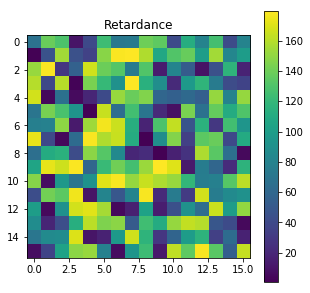


- Angles of M are:
The mean value of param Alpha is 43.23874635564478 +- 16.18363601655687
The mean value of param Delay is 182.38524939361824 +- 104.50003334015464
The mean value of param Azimuth is 86.53343969038741 +- 52.958597211887025
The mean value of param Ellipticity angle is -0.3673241927827955 +- 25.618696628808262


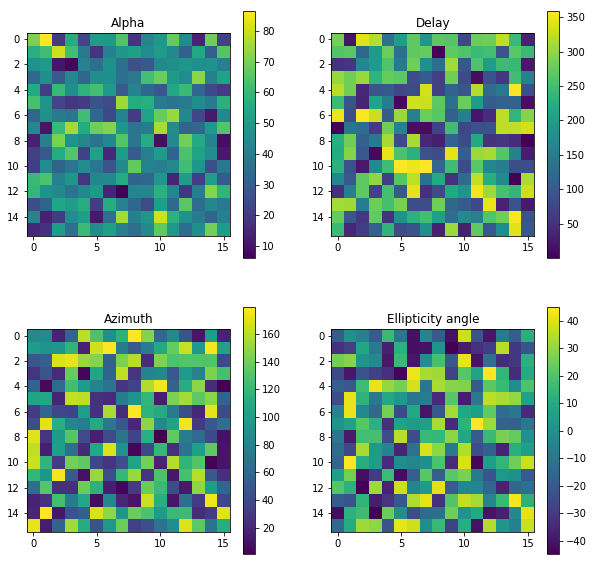

In [113]:
N=16
R = np.random.rand(N,N) * 180*degrees
azimuth = np.random.rand(N,N) * 180*degrees
ellipticity = np.random.rand(N,N) * 90*degrees - 45*degrees
M1 = Mueller()
M1.retarder_azimuth_ellipticity(R=R, azimuth=azimuth, ellipticity=ellipticity)
trans, angles = M1.analysis.retarder(draw =True)

In [114]:
# depolarizer
M = np.random.rand(4, 4) / 3
M[0, 0] = 1
M1 = Mueller()
M1.from_matrix(M)
_ = M1.analysis.depolarizer(verbose=True)


Analysis of M as depolarizer:
- Transmissions of M from diattenuation are:
  Max. transmission
1.4095851454222854
  Min. transmission
0.5904148545777146
  p1
1.1872595105629962
  p2
0.7683845746614872

- Transmissions of M from polarizance are:
  Max. transmission
1.2005878585291772
  Min. transmission
0.799412141470823
  p1
1.0957134016380274
  p2
0.8940985076996958

- Angles of M from diattenuation are:
  Alpha
[38.8318]
  Delay
[55.5119]
  Azimuth
[34.4408]
  Ellipticity angle
[26.8154]

- Angles of M from polarizance are:
  Alpha
[40.5811]
  Delay
[35.752]
  Azimuth
[39.5772]
  Ellipticity angle
[17.6318]

- Depolarization index of M is:
0.8907720781397545




Analysis of M as depolarizer:
- Transmissions of M from diattenuation are:
The mean value of param Max. transmission is 1.3137546812887173 +- 0.08657113353971481
The mean value of param Min. transmission is 0.6862453187112825 +- 0.0865711335397148
The mean value of param p1 is 1.145568479610343 +- 0.03778279783134784
The mean value of param p2 is 0.8267222089206042 +- 0.052684988267241765


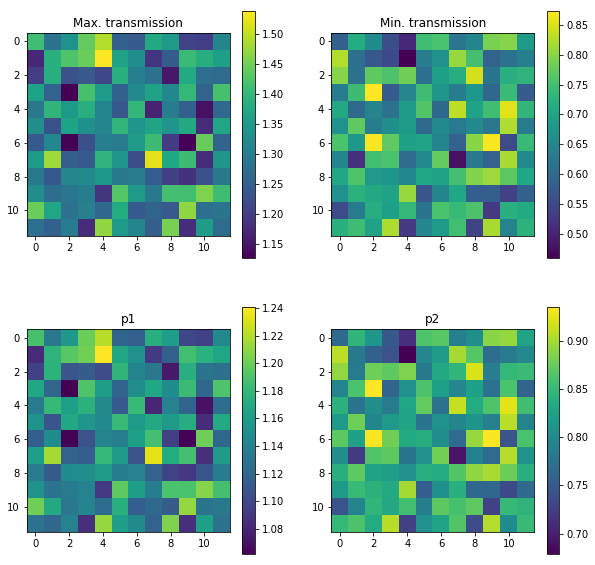


- Transmissions of M from polarizance are:
The mean value of param Max. transmission is 1.3205703423744783 +- 0.09142936120465019
The mean value of param Min. transmission is 0.6794296576255218 +- 0.09142936120465019
The mean value of param p1 is 1.1484495365638148 +- 0.040422819555757
The mean value of param p2 is 0.822475234711468 +- 0.05444397039009182


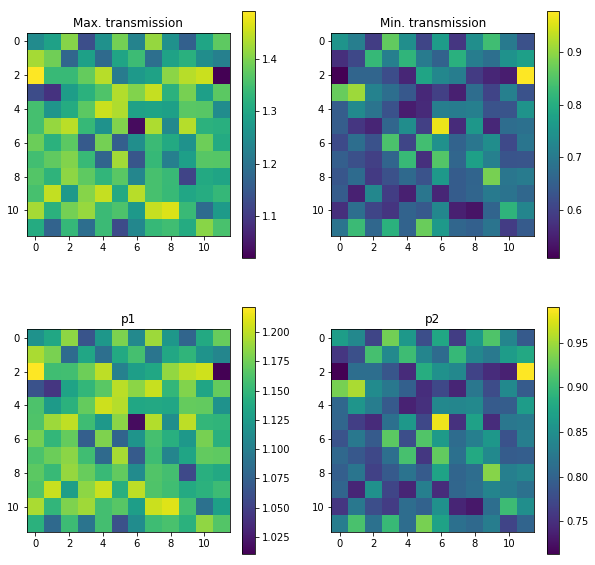


- Angles of M from diattenuation are:
The mean value of param Alpha is 28.06496713859344 +- 9.771559018491057
The mean value of param Delay is 42.28247955995026 +- 23.13266727604921
The mean value of param Azimuth is 22.77027334366744 +- 11.927301445043886
The mean value of param Ellipticity angle is 15.519732083481793 +- 9.018164389976295


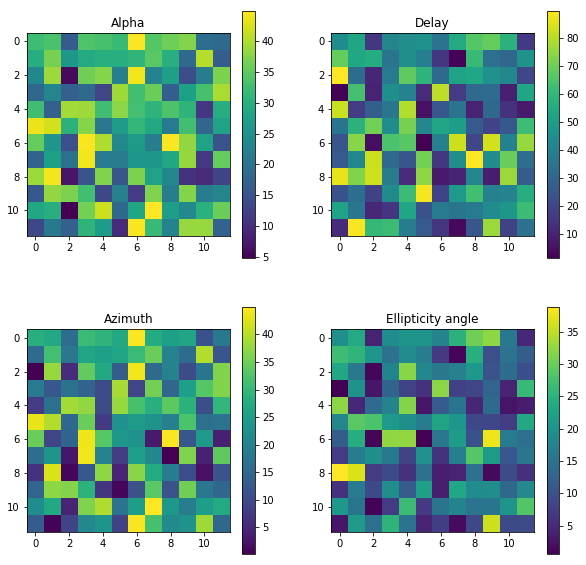


- Angles of M from polarizance are:
The mean value of param Alpha is 27.830946737405775 +- 9.690862151324836
The mean value of param Delay is 42.797711718494725 +- 24.120032587562164
The mean value of param Azimuth is 22.519402470883236 +- 11.837981211965037
The mean value of param Ellipticity angle is 15.378310539420385 +- 9.414464638324443


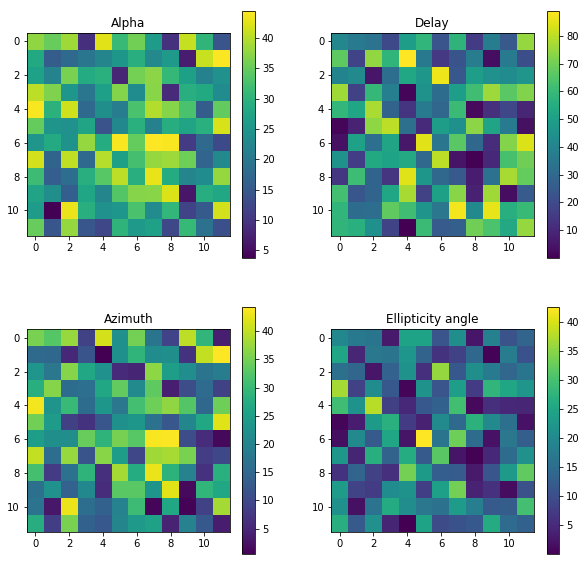


- Depolarization index of M is:
The mean value is 0.9055194383125834 +- 0.022563234809650192


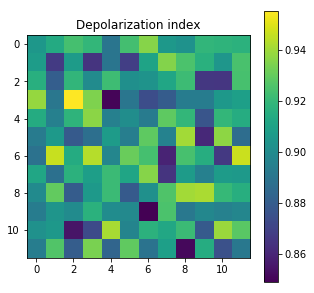

In [115]:
M = np.random.rand(4, 4,12,12) / 3
M[0, 0,:] = 1
M1 = Mueller()
M1.from_matrix(M)
_ = M1.analysis.depolarizer(draw=True)

In [116]:
# decompose_pure
N = 1
p1 = np.random.rand(N)/2 + 0.5
p2 = np.random.rand(N)/2
alphaD = np.random.rand(N) * 90*degrees
delayD = np.random.rand(N) * 360*degrees
alphaR = np.random.rand(N) * 90*degrees
delayR = np.random.rand(N) * 360*degrees
R = np.random.rand(N) * 180*degrees
print('Original:')
print('- p1 = {};   - p2 = {};   - alphaD = {};   - delayD = {}'.format(p1, p2, alphaD/degrees, delayD/degrees))
print('- R = {};   - alphaR = {};   - delayR = {}'.format(R/degrees, alphaR/degrees, delayR/degrees))

Mr, Md = create_Mueller(N=2)
Mr.retarder_charac_angles(R=R, alpha=alphaR, delay=delayR)
Md.diattenuator_charac_angles(p1=p1, p2=p2, alpha=alphaD, delay=delayD)
M = Mr * Md
M.name = 'Test'
Mr2, Md2, param = M.analysis.decompose_pure(verbose=True, out_number=True, give_all=True)
print(param['Error'][0])
print(M, Mr2*Md2)
print(Md, Md2)
print(Mr, Mr2)

Original:
- p1 = [0.51];   - p2 = [0.3145];   - alphaD = [68.3744];   - delayD = [11.949]
- R = [97.4816];   - alphaR = [35.8709];   - delayR = [45.7486]

------------------------------------------------------
Pure decomposition of Test as M = Mr * Md.

Analysis of Diattenuator of Test as diattenuator:

- Transmissions of Diattenuator of Test are:
  Max. transmission
0.2601208734784714
  Min. transmission
0.09892216563320923
  p1
0.5100204637840244
  p2
0.31451894320248697

- Angles of Diattenuator of Test are:
  Alpha
[68.3744]
  Delay
[11.949]
  Azimuth
[68.6874]
  Ellipticity angle
[4.0778]

Diattenuator of Test = 
[+0.180 -0.059 +0.054 +0.011]   
[-0.059 +0.171 -0.009 -0.002]   
[+0.054 -0.009 +0.169 +0.002]   
[+0.011 -0.002 +0.002 +0.161]   


Analysis of Retarder of Test as retarder:

- Retardance of Retarder of Test is:
97.48161203189805

- Angles of Retarder of Test are:
  Alpha
[35.8709]
  Delay
[45.7486]
  Azimuth
[32.348]
  Ellipticity angle
[21.4305]

Retarder of Test = 
[

In [132]:
# decompose_pure
N = 10
p1 = np.random.rand(N)/2 + 0.5
p2 = 0
alphaD = np.random.rand(N) * 90*degrees
delayD = np.random.rand(N) * 360*degrees
alphaR = np.random.rand(N) * 90*degrees
delayR = np.random.rand(N) * 360*degrees
R = np.random.rand(N) * 180*degrees
print('Original:')
print('- p1 = {};   - p2 = {};   - alphaD = {};   - delayD = {}'.format(p1, p2, alphaD/degrees, delayD/degrees))
print('- R = {};   - alphaR = {};   - delayR = {}'.format(R/degrees, alphaR/degrees, delayR/degrees))

Mr, Md = create_Mueller(N=2)
Mr.retarder_charac_angles(R=R, alpha=alphaR, delay=delayR)
Md.diattenuator_charac_angles(p1=p1, p2=p2, alpha=alphaD, delay=delayD)
M = Mr * Md
print(M)
M.name = 'Test'
Mr2, Md2, param = M.analysis.decompose_pure(verbose=True, out_number=False, give_all=True)
print(param['Error'][0])
print(M, Mr2*Md2)
print(Md, Md2)
print(Mr, Mr2)

Original:
- p1 = [0.7556 0.8678 0.985  0.9485 0.6873 0.7286 0.8737 0.9696 0.9022 0.9445];   - p2 = 0;   - alphaD = [51.995   5.4234 42.8556  5.0603 19.0729 55.3779 61.3427 68.3889  0.4742 76.2516];   - delayD = [134.077   92.204  181.6026 109.8021   9.0853 286.4862   6.5079 300.9883 247.1243 189.0844]
- R = [178.318   93.3589 150.3036  63.1347   2.8432 179.2115 116.6172  55.7263  71.3127 124.4358];   - alphaR = [77.3259 36.5461 75.7875 81.2079 60.3097 61.4665 42.8621 63.5614 49.8291 21.1167];   - delayR = [222.1883 339.8417 132.328   24.3589  63.3987  33.2669 106.1683 219.6644 164.5671  14.4456]
M * M M00 = [0.2855 0.3766 0.4851 0.4499 0.2362 0.2654 0.3817 0.4701 0.407  0.4461]
      M01 = [-0.069   0.3698  0.0363  0.4429  0.1857 -0.0941 -0.2061 -0.3425  0.407  -0.3957]
      M02 = [-0.1927 -0.0027 -0.4836 -0.0268  0.144   0.0704  0.3192  0.1657 -0.0026 -0.2034]
      M03 = [ 0.199   0.0708 -0.0135  0.0744  0.023  -0.238   0.0364 -0.276  -0.0062 -0.0325]
      M10 = [-0.0473 -0.0591 -0

d:\codigo_ucm\py_pol\py_pol\mueller.py:5061: RuntimeWarning: divide by zero encountered in true_divide
  p2=1 / p2,
d:\codigo_ucm\py_pol\py_pol\mueller.py:1880: RuntimeWarning: invalid value encountered in true_divide
  cte = (Tmax - Tmin) / (Tmax + Tmin)
d:\codigo_ucm\py_pol\py_pol\mueller.py:1940: RuntimeWarning: invalid value encountered in true_divide
  cte = (1 - skd) / d**2
d:\codigo_ucm\py_pol\py_pol\utils.py:671: RuntimeWarning: invalid value encountered in multiply
  cte * np.take(D, 2, axis=ind).flatten(),
d:\codigo_ucm\py_pol\py_pol\utils.py:672: RuntimeWarning: invalid value encountered in multiply
  ])
d:\codigo_ucm\py_pol\py_pol\utils.py:673: RuntimeWarning: invalid value encountered in multiply
  shape2 = np.delete(shape2, ind)
d:\codigo_ucm\py_pol\py_pol\utils.py:697: RuntimeWarning: invalid value encountered in multiply
  cte * np.take(P, 2, axis=ind).flatten(),
d:\codigo_ucm\py_pol\py_pol\utils.py:698: RuntimeWarning: invalid value encountered in multiply
  ])
d:\codi

In [134]:
# decompose_polar
N = 1
p1 = np.random.rand(N)/2 + 0.5
p2 = np.random.rand(N)/2
alphaD = np.random.rand(N) * 90*degrees
delayD = np.random.rand(N) * 360*degrees
alphaR = np.random.rand(N) * 90*degrees
delayR = np.random.rand(N) * 360*degrees
R = np.random.rand(N) * 180*degrees
print('Original:')
print('- p1 = {};   - p2 = {};   - alphaD = {};   - delayD = {}'.format(p1, p2, alphaD/degrees, delayD/degrees))
print('- R = {};   - alphaR = {};   - delayR = {}'.format(R/degrees, alphaR/degrees, delayR/degrees))

Mr, Md = create_Mueller(N=2)
Mr.retarder_charac_angles(R=R, alpha=alphaR, delay=delayR)
Md.diattenuator_charac_angles(p1=p1, p2=p2, alpha=alphaD, delay=delayD)
M = Mr * Md
M.name = 'Test'
Mr2, Md2, Mp2, param = M.analysis.decompose_polar(verbose=True, out_number=True, give_all=True)

Original:
- p1 = [0.8428];   - p2 = [0.4853];   - alphaD = [36.4639];   - delayD = [268.7299]
- R = [121.9186];   - alphaR = [5.842];   - delayR = [341.8978]

------------------------------------------------------
Polar decomposition of Test as M = Mp * Mr * Md.

Analysis of Diattenuator of Test as diattenuator:

- Transmissions of Diattenuator of Test are:
  Max. transmission
0.7103024015576678
  Min. transmission
0.2355044598606655
  p1
0.8427944005258149
  p2
0.48528801742951116

- Angles of Diattenuator of Test are:
  Alpha
[36.4639]
  Delay
[268.7299]
  Azimuth
[177.9359]
  Ellipticity angle
[-36.441]

Diattenuator of Test = 
[+0.473 +0.070 -0.005 -0.227]   
[+0.070 +0.415 -0.000 -0.018]   
[-0.005 -0.000 +0.409 +0.001]   
[-0.227 -0.018 +0.001 +0.467]   


Analysis of Retarder of Test as retarder:

- Retardance of Retarder of Test is:
111.27829344817286

- Angles of Retarder of Test are:
  Alpha
[6.5734]
  Delay
[188.5175]
  Azimuth
[173.4967]
  Ellipticity angle
[-0.9653]

Retar

In [142]:
N = 10
p1 = np.random.rand(N)/2 + 0.5
p2 = np.random.rand(N)/2
alphaD = np.random.rand(N) * 90*degrees
delayD = np.random.rand(N) * 360*degrees
alphaR = np.random.rand(N) * 90*degrees
delayR = np.random.rand(N) * 360*degrees
R = np.random.rand(N) * 180*degrees
M = np.array([[1, 0, 0, 0], [0.1, 1, 0.1, 0], [0.1, 0.1, 1, 0], [0.1, 0, 0, 1]])
print('Original:')
print('- p1 = {};   - p2 = {};   - alphaD = {};   - delayD = {}'.format(p1, p2, alphaD/degrees, delayD/degrees))
print('- R = {};   - alphaR = {};   - delayR = {}'.format(R/degrees, alphaR/degrees, delayR/degrees))

Mr, Md, Mp = create_Mueller(N=3)
Mr.retarder_charac_angles(R=R, alpha=alphaR, delay=delayR)
Md.diattenuator_charac_angles(p1=p1, p2=p2, alpha=alphaD, delay=delayD)
Mp.from_matrix(M)
print(Mp)
M = Mp * Mr * Md
M.name = 'Test'
Mr2, Md2, Mp2, param = M.analysis.decompose_polar(verbose=True, out_number=True, give_all=True)

Original:
- p1 = [0.6713 0.7597 0.5505 0.7452 0.8823 0.7376 0.539  0.8739 0.9814 0.5992];   - p2 = [0.423  0.2903 0.4957 0.2262 0.127  0.3637 0.236  0.2372 0.0299 0.0297];   - alphaD = [ 8.0423 13.9549 10.4339 79.0318 13.4295 60.0148 46.1929 50.4892 79.1255 72.6849];   - delayD = [ 21.9584  42.301  356.6888 258.647  116.3771 249.7978 117.0135 268.1397 321.8175  82.2993]
- R = [ 28.659  167.9492  57.7076 130.8988  61.9281 164.6352  25.6177  71.537   79.1047 115.7024];   - alphaR = [78.6594 30.6868 60.1057  8.8366 11.2981 31.3758 42.8997 32.4011 84.9397 44.2014];   - delayR = [ 52.0747 108.6722  52.2472  14.5668 350.3219 126.9529 105.8277 127.6478 226.5417 222.4352]
M = 
[+1.000 +0.000 +0.000 +0.000]   
[+0.100 +1.000 +0.100 +0.000]   
[+0.100 +0.100 +1.000 +0.000]   
[+0.100 +0.000 +0.000 +1.000]   

[False False False False False False False False  True  True]
N =  [4 4 4 4 4 4 4 4 4 4]

------------------------------------------------------
Polar decomposition of Test as M = Mp * Mr *

d:\codigo_ucm\py_pol\py_pol\mueller.py:3582: RuntimeWarning: invalid value encountered in sqrt
  DI = sqrt(1. - PP**2)


M = 
[+1.000 +0.000 +0.000 +0.000]   
[+0.100 +1.000 +0.100 +0.000]   
[+0.100 +0.100 +1.000 +0.000]   
[+0.100 +0.000 +0.000 +1.000]   


------------------------------------------------------
Polar decomposition of Test as M = Mp * Mr * Md.

Analysis of Diattenuator of Test as diattenuator:

- Transmissions of Diattenuator of Test are:
The mean value of param Max. transmission is 0.611200140813687 +- 0.19572265171751851
The mean value of param Min. transmission is 0.07884777834177505 +- 0.06929925367807534
The mean value of param p1 is 0.7711246594501285 +- 0.1287124718184297
The mean value of param p2 is 0.24481228677688183 +- 0.13753080594851766


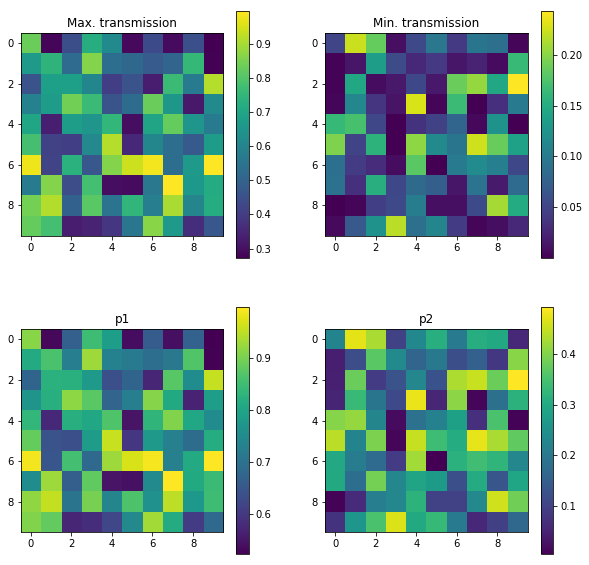


- Angles of Diattenuator of Test are:
The mean value of param Alpha is 43.703038897980356 +- 24.53211948883956
The mean value of param Delay is 184.73514282976473 +- 103.67166440244418
The mean value of param Azimuth is 93.26974276014296 +- 54.59523234912774
The mean value of param Ellipticity angle is 0.6661948962648314 +- 15.76245952811099


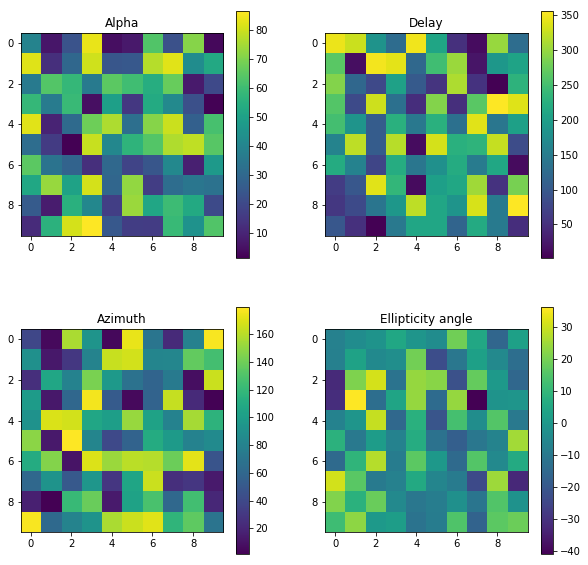



Analysis of Retarder of Test as retarder:

- Retardance of Retarder of Test is:
The mean value is 94.1736739102102 +- 53.24036913116564


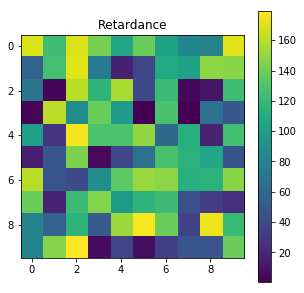


- Angles of Retarder of Test are:
The mean value of param Alpha is 44.09533253018829 +- 25.40607170692036
The mean value of param Delay is 177.98497335256516 +- 99.496966884096
The mean value of param Azimuth is 93.72717570026687 +- 54.533691606097086
The mean value of param Ellipticity angle is 0.03863850638550295 +- 16.208471361845955


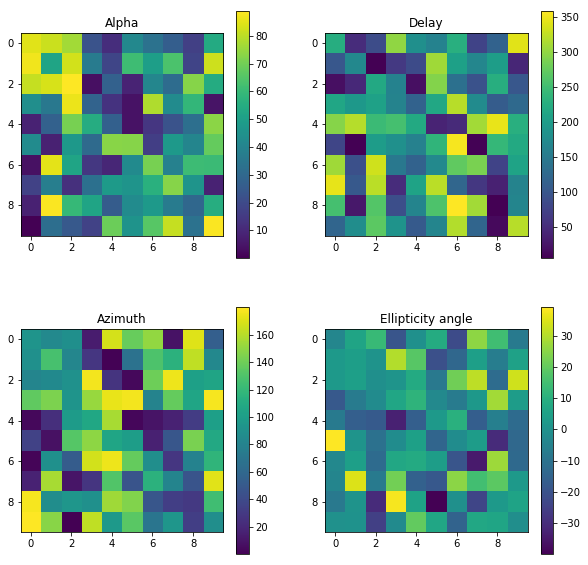



Analysis of Depolarizer of Test as depolarizer:
- Transmissions of Depolarizer of Test from diattenuation are:


d:\codigo_ucm\py_pol\py_pol\mueller.py:3582: RuntimeWarning: invalid value encountered in sqrt
  DI = sqrt(1. - PP**2)


The mean value of param Max. transmission is 1.0 +- 0.0
The mean value of param Min. transmission is 1.0 +- 0.0
The mean value of param p1 is 1.0 +- 0.0
The mean value of param p2 is 1.0 +- 0.0


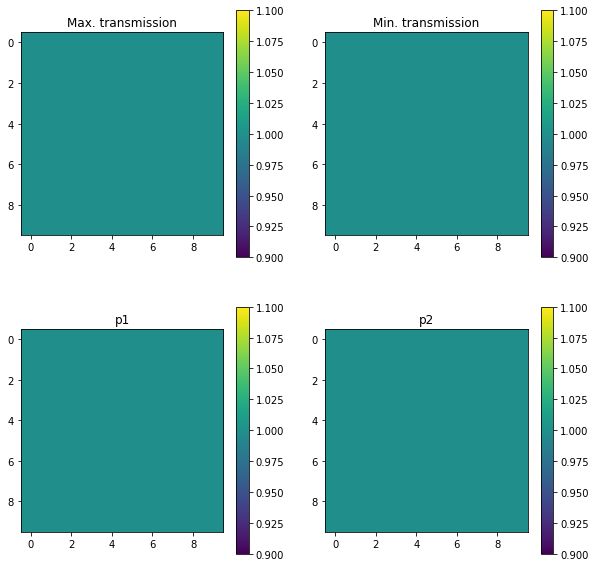


- Transmissions of Depolarizer of Test from polarizance are:
The mean value of param Max. transmission is 1.1732050807568526 +- 2.891580060009241e-13
The mean value of param Min. transmission is 0.8267949192431473 +- 2.891682791496716e-13
The mean value of param p1 is 1.0831459184970662 +- 1.3348831161312012e-13
The mean value of param p2 is 0.9092826399107966 +- 1.590093771850248e-13


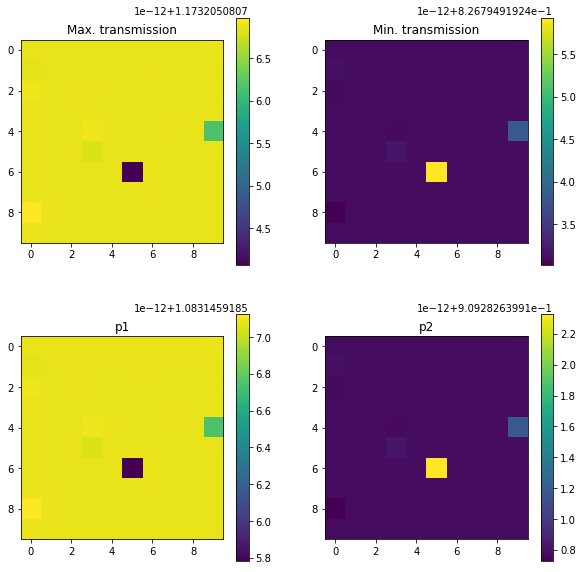


- Angles of Depolarizer of Test from diattenuation are:
The mean value of param Alpha is 45.0 +- 0.0
The mean value of param Delay is 0.0 +- 0.0
The mean value of param Azimuth is 45.0 +- 0.0
The mean value of param Ellipticity angle is 0.0 +- 0.0


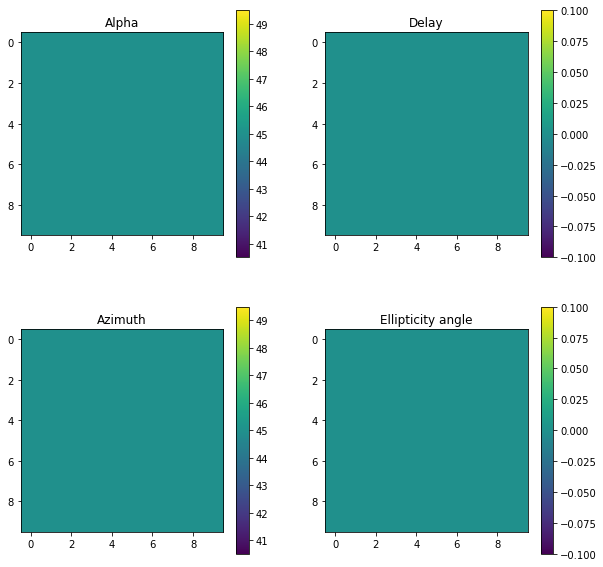


- Angles of Depolarizer of Test from polarizance are:
The mean value of param Alpha is 27.367805158620012 +- 2.3690053122633878e-11
The mean value of param Delay is 45.00000000000826 +- 1.179435565359308e-10
The mean value of param Azimuth is 22.499999999995115 +- 5.410600478994616e-11
The mean value of param Ellipticity angle is 17.632194841378922 +- 3.0463683655664936e-11


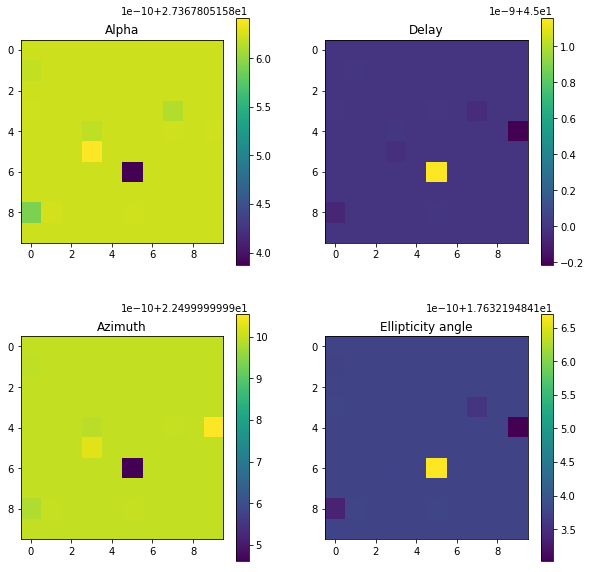


- Depolarization index of Depolarizer of Test is:
The mean value is nan +- nan


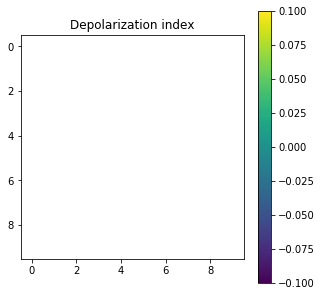


Test decomposition mean square error:
The mean value is 2.2811957372568167e-15 +- 1.787738291471161e-14


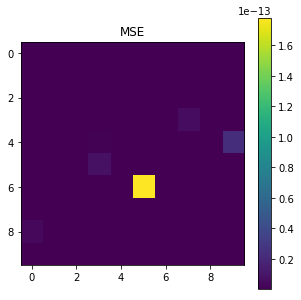


------------------------------------------------------



In [146]:
N = 10
p1 = np.random.rand(N,N)/2 + 0.5
p2 = np.random.rand(N,N)/2
alphaD = np.random.rand(N,N) * 90*degrees
delayD = np.random.rand(N,N) * 360*degrees
alphaR = np.random.rand(N,N) * 90*degrees
delayR = np.random.rand(N,N) * 360*degrees
R = np.random.rand(N,N) * 180*degrees
M = np.array([[1, 0, 0, 0], [0.1, 1, 0.1, 0], [0.1, 0.1, 1, 0], [0.1, 0, 0, 1]])

Mr, Md, Mp = create_Mueller(N=3)
Mr.retarder_charac_angles(R=R, alpha=alphaR, delay=delayR)
Md.diattenuator_charac_angles(p1=p1, p2=p2, alpha=alphaD, delay=delayD)
Mp.from_matrix(M)
print(Mp)
M = Mp * Mr * Md
M.name = 'Test'
Mr2, Md2, Mp2, param = M.analysis.decompose_polar(draw=True, out_number=True, give_all=True)

In [176]:
N = 10
p1 = np.random.rand(N)/2 + 0.5
p2 = np.random.rand(N)/2
alphaD = np.random.rand(N) * 90*degrees
delayD = np.random.rand(N) * 360*degrees
alphaR = np.random.rand(N) * 90*degrees
delayR = np.random.rand(N) * 360*degrees
R = np.random.rand(N) * 180*degrees
M = np.array([[1, 0, 0, 0], [0.1, 1, 0.1, 0], [0.1, 0.1, 1, 0], [0.1, 0, 0, 0]])
print('Original:')
print('- p1 = {};   - p2 = {};   - alphaD = {};   - delayD = {}'.format(p1, p2, alphaD/degrees, delayD/degrees))
print('- R = {};   - alphaR = {};   - delayR = {}'.format(R/degrees, alphaR/degrees, delayR/degrees))

Mr, Md, Mp = create_Mueller(N=3)
Mr.retarder_charac_angles(R=R, alpha=alphaR, delay=delayR)
Md.diattenuator_charac_angles(p1=p1, p2=p2, alpha=alphaD, delay=delayD)
Mp.from_matrix(M)
print(Mp)
M = Mp * Mr * Md
M.name = 'Test'
Mr2, Md2, Mp2, param = M.analysis.decompose_polar(verbose=True, out_number=True, give_all=True)
print('Error in the retarder:      ', np.linalg.norm(Mr2.M-Mr.M))
print('Error in the diattenuator:  ', np.linalg.norm(Md2.M-Md.M))
print('Error in the depolarizer:   ', np.linalg.norm(Mp2.M-Mp.M))


Original:
- p1 = [0.6401 0.7856 0.5338 0.5029 0.6136 0.5503 0.6167 0.6787 0.5223 0.5405];   - p2 = [0.0026 0.0748 0.0214 0.4532 0.0971 0.205  0.2939 0.3315 0.2201 0.2616];   - alphaD = [26.1626 80.3597 41.3213  6.9965 36.6315 80.8291 49.8581 39.0583 46.5597 29.6188];   - delayD = [312.1592  45.0941 141.1334 211.1703 276.3991 166.7846 180.0867 327.1402 182.4807 184.2824]
- R = [ 86.3225 108.0068  47.0676  37.8244  31.6484 153.729   62.9582  70.4971 178.2979 121.0088];   - alphaR = [38.3536 29.9542  5.4486 76.1046 16.6006 64.4999 77.1893 43.5235 74.425  23.404 ];   - delayR = [ 77.2203 147.5596  54.6673 123.049  316.2956 227.8634 147.1974 243.1118 115.6272 190.6472]
M = 
[+1.000 +0.000 +0.000 +0.000]   
[+0.100 +1.000 +0.100 +0.000]   
[+0.100 +0.100 +1.000 +0.000]   
[+0.100 +0.000 +0.000 +0.000]   

Cond =  [ True  True  True  True  True  True  True  True  True  True]
N =  [3 3 3 3 3 3 3 3 3 3]

------------------------------------------------------
Polar decomposition of Test as M = M

d:\codigo_ucm\py_pol\py_pol\mueller.py:5256: RuntimeWarning: divide by zero encountered in true_divide
  [1 / np.sqrt(val[2, :])] + 4 * [0] +


In [155]:
N = 
p1 = np.random.rand(N)/2 + 0.5
p2 = np.random.rand(N)/2
alphaD = np.random.rand(N) * 90*degrees
delayD = np.random.rand(N) * 360*degrees
alphaR = np.random.rand(N) * 90*degrees
delayR = np.random.rand(N) * 360*degrees
R = np.random.rand(N) * 180*degrees
M = np.array([[1, 0, 0, 0], [0.1, 0.95, 0, 0], [0.1, 0, 0, 0], [0.1, 0, 0, 0]])
print('Original:')
print('- p1 = {};   - p2 = {};   - alphaD = {};   - delayD = {}'.format(p1, p2, alphaD/degrees, delayD/degrees))
print('- R = {};   - alphaR = {};   - delayR = {}'.format(R/degrees, alphaR/degrees, delayR/degrees))

Mr, Md, Mp = create_Mueller(N=3)
Mr.retarder_charac_angles(R=R, alpha=alphaR, delay=delayR)
Md.diattenuator_charac_angles(p1=p1, p2=p2, alpha=alphaD, delay=delayD)
Mp.from_matrix(M)
print(Mp)
M = Mp * Mr * Md
M.name = 'Test'
Mr2, Md2, Mp2, param = M.analysis.decompose_polar(verbose=True, out_number=True, give_all=True)
print('Error in the retarder:      ', np.linalg.norm(Mr2.M-Mr.M))
print('Error in the diattenuator:  ', np.linalg.norm(Md2.M-Md.M))
print('Error in the depolarizer:   ', np.linalg.norm(Mp2.M-Mp.M))

Original:
- p1 = [0.5122 0.6744 0.8006 0.5826 0.5412 0.7118 0.7545 0.8251 0.7052 0.8389];   - p2 = [0.3627 0.303  0.3547 0.4325 0.003  0.2657 0.3311 0.1258 0.3743 0.1406];   - alphaD = [55.9742 58.7561 12.5832 89.5092 36.6181  6.08   68.5437 80.5444 28.9605 67.1571];   - delayD = [193.085   67.1023 155.5828  50.9915 274.0766 290.6148  22.5099  86.0324 136.7739 277.7224]
- R = [  3.8674  78.8469   1.8115 139.4445 150.2489 130.7728  76.3333 101.0458 165.8598 161.5345];   - alphaR = [17.1132 55.3254 60.2053 27.6074 45.3796 33.8386 11.7804 56.9541  1.7705 42.6311];   - delayR = [133.6147 210.0333 282.3667  85.0844 282.6195 348.6455 125.5268 206.9592 223.189  290.6539]
M = 
[+1.000 +0.000 +0.000 +0.000]   
[+0.100 +0.950 +0.000 +0.000]   
[+0.100 +0.000 +0.000 +0.000]   
[+0.100 +0.000 +0.000 +0.000]   

N =  [2 2 2 2 2 2 2 2 2 2]
R (traces) =  [0.038  1.2726 0.0273 1.7589 2.6217 1.9983 0.4992 1.5667 0.1227 2.7797]
R (vectors) =  [3.1036 1.8689 0.0273 1.3827 2.6217 1.9983 2.6424 1.5667 3.01

In [130]:
N = 10
p1 = np.random.rand(N)/2 + 0.5
p2 = np.random.rand(N)/2
alphaD = np.random.rand(N) * 90*degrees
delayD = np.random.rand(N) * 360*degrees
alphaR = np.random.rand(N) * 90*degrees
delayR = np.random.rand(N) * 360*degrees
R = np.random.rand(N) * 180*degrees
M = np.array([[1, 0, 0, 0], [0.1, 0, 0, 0], [0.1, 0, 0, 0], [0.1, 0, 0, 0]])
print('Original:')
print('- p1 = {};   - p2 = {};   - alphaD = {};   - delayD = {}'.format(p1, p2, alphaD/degrees, delayD/degrees))
print('- R = {};   - alphaR = {};   - delayR = {}'.format(R/degrees, alphaR/degrees, delayR/degrees))

Mr, Md, Mp = create_Mueller(N=3)
Mr.retarder_charac_angles(R=R, alpha=alphaR, delay=delayR)
Md.diattenuator_charac_angles(p1=p1, p2=p2, alpha=alphaD, delay=delayD)
Mp.from_matrix(M)
print(Mp)
M = Mp * Mr * Md
M.name = 'Test'
Mr2, Md2, Mp2, param = M.analysis.decompose_polar(verbose=True, out_number=True, give_all=True)
print('Error in the retarder:      ', np.linalg.norm(Mr2.M-Mr.M))
print('Error in the diattenuator:  ', np.linalg.norm(Md2.M-Md.M))
print('Error in the depolarizer:   ', np.linalg.norm(Mp2.M-Mp.M))

Original:
- p1 = [0.5122 0.5011 0.5455 0.8658 0.8672 0.5854 0.7219 0.8242 0.9183 0.7633];   - p2 = [0.4298 0.3157 0.2368 0.3203 0.2939 0.3632 0.2856 0.4465 0.2934 0.259 ];   - alphaD = [33.5412 16.2289 67.0374 23.9439 76.7034  8.1521 75.2204  1.0662 54.5047 31.4575];   - delayD = [209.7125  67.9659 221.8765 304.396  318.9322  30.2209 254.4804   0.8946 180.9667 207.0452]
- R = [  8.7508   5.0572  60.3656  20.2951  98.9034  40.1275 142.6983  51.2876  12.4245  41.524 ];   - alphaR = [62.7632 15.0654 52.3565 18.9283  2.0329 49.224  40.7924 33.2695 49.832  23.7377];   - delayR = [ 26.6361  59.7106 202.1388  15.6866 173.2842  65.6578 284.07   213.1929 269.0746 172.6997]
M = 
[+1.000 +0.000 +0.000 +0.000]   
[+0.100 +0.000 +0.000 +0.000]   
[+0.100 +0.000 +0.000 +0.000]   
[+0.100 +0.000 +0.000 +0.000]   


------------------------------------------------------
Polar decomposition of Test as M = Mp * Mr * Md.

Analysis of Diattenuator of Test as diattenuator:

- Transmissions of Diattenuator 

d:\codigo_ucm\py_pol\py_pol\utils.py:1346: RuntimeWarning: invalid value encountered in matmul
  return M


In [128]:
# Caso p2=0 (diatenuador singular)
N = 10
p1 = np.random.rand(N)/2 + 0.5
p2 = 0
alphaD = np.random.rand(N) * 90*degrees
delayD = np.random.rand(N) * 360*degrees
alphaR = np.random.rand(N) * 90*degrees
delayR = np.random.rand(N) * 360*degrees
R = np.random.rand(N) * 180*degrees
M = np.array([[1, 0, 0, 0], [0.1, 1, 0.1, 0], [0.1, 0.1, 1, 0], [0.1, 0, 0, 1]])
print('Original:')
print('- p1 = {};   - p2 = {};   - alphaD = {};   - delayD = {}'.format(p1, p2, alphaD/degrees, delayD/degrees))
print('- R = {};   - alphaR = {};   - delayR = {}'.format(R/degrees, alphaR/degrees, delayR/degrees))

Mr, Md, Mp = create_Mueller(N=3)
Mr.retarder_charac_angles(R=R, alpha=alphaR, delay=delayR)
Md.diattenuator_charac_angles(p1=p1, p2=p2, alpha=alphaD, delay=delayD)
Mp.from_matrix(M)
print(Mp)
M = Mp * Mr * Md
M.name = 'Test'
Mr2, Md2, Mp2, param = M.analysis.decompose_polar(verbose=True, out_number=True, give_all=True)
print('Error in the retarder:      ', np.linalg.norm(Mr2.M-Mr.M))
print('Error in the diattenuator:  ', np.linalg.norm(Md2.M-Md.M))
print('Error in the depolarizer:   ', np.linalg.norm(Mp2.M-Mp.M))

Original:
- p1 = [0.613  0.5162 0.9189 0.5598 0.9505 0.8137 0.6505 0.8253 0.6421 0.7243];   - p2 = 0;   - alphaD = [43.6324 21.0112 29.9742 22.3708 32.373  12.1421 25.1679 14.894  71.2231 24.1154];   - delayD = [173.862  268.959  207.8459 347.7523  38.2563  79.1035 325.5122  31.2537  61.4464 197.6295]
- R = [ 81.3753  57.709   88.534  179.0414  80.1325 103.0876 153.5336  40.0475 132.8132  48.0271];   - alphaR = [24.7344 86.8745 33.6454 52.448  12.4937 48.6489 66.5925 86.0445 66.0687 51.6241];   - delayR = [293.9081 101.4702   9.2146 280.2646  18.9608 181.3457 252.6994 295.0392 141.7662 318.871 ]
M = 
[+1.000 +0.000 +0.000 +0.000]   
[+0.100 +1.000 +0.100 +0.000]   
[+0.100 +0.100 +1.000 +0.000]   
[+0.100 +0.000 +0.000 +1.000]   


------------------------------------------------------
Polar decomposition of Test as M = Mp * Mr * Md.

Analysis of Diattenuator of Test as diattenuator:

- Transmissions of Diattenuator of Test are:
  Max. transmission
[0.3758 0.2664 0.8444 0.3134 0.9035 0

d:\codigo_ucm\py_pol\py_pol\mueller.py:5224: RuntimeWarning: divide by zero encountered in true_divide
  p2=1 / p2,
d:\codigo_ucm\py_pol\py_pol\mueller.py:1816: RuntimeWarning: invalid value encountered in true_divide
  cte = (Tmax - Tmin) / (Tmax + Tmin)
d:\codigo_ucm\py_pol\py_pol\mueller.py:5257: RuntimeWarning: divide by zero encountered in true_divide
  [np.sign(det) / np.sqrt(val[3, :])])
d:\codigo_ucm\py_pol\py_pol\mueller.py:5257: RuntimeWarning: invalid value encountered in true_divide
  [np.sign(det) / np.sqrt(val[3, :])])


In [219]:
# different decompositions
N = 10
p1 = np.random.rand(N)/2 + 0.5
p2 = np.random.rand(N)/2
alphaD = np.random.rand(N) * 90*degrees
delayD = np.random.rand(N) * 360*degrees
alphaR = np.random.rand(N) * 90*degrees
delayR = np.random.rand(N) * 360*degrees
R = np.random.rand(N) * 180*degrees
M = np.array([[1, 0, 0, 0], [0.1, 1, 0.1, 0], [0.1, 0.1, 1, 0], [0.1, 0, 0, 1]])

Mr, Md, Mp = create_Mueller(('Original retarder', 'Original diattenuator', 'Original depolarizer'))
Mr.retarder_charac_angles(R=R, alpha=alphaR, delay=delayR)
Md.diattenuator_charac_angles(p1=p1, p2=p2, alpha=alphaD, delay=delayD)
Mp.from_matrix(M)
# print(Mr, Md, Mp, Mp.transpose(keep=True))

dec = 'PRD'
M = Mp * Mr * Md
M.name = 'Test'
Mr2, Md2, Mp2, param = M.analysis.decompose_polar(out_number=True, give_all=True, decomposition=dec)
print(dec, param['Error'])
# print(M,Mr2, Md2, Mp2)

dec = 'PDR'
M = Mp * Md * Mr
M.name = 'Test'
Mr2, Md2, Mp2, param = M.analysis.decompose_polar(out_number=True, give_all=True, decomposition=dec)
print(dec, param['Error'])
# print(M,Mr2, Md2, Mp2)


dec = 'RPD'
M = Mr * Mp * Md
M.name = 'Test'
Mr2, Md2, Mp2, param = M.analysis.decompose_polar(out_number=True, give_all=True, decomposition=dec)
print(dec, param['Error'])
# print(M,Mr2, Md2, Mp2)

dec = 'DRP'
M = Md * Mr * Mp.transpose(keep=True)
M.name = 'Test'
Mr2, Md2, Mp2, param = M.analysis.decompose_polar(out_number=True, give_all=True, decomposition=dec)
print(dec, param['Error'])
# print('Error in the retarder:      ', np.linalg.norm(Mr2.M-Mr.M, axis=(0,1)))
# print('Error in the diattenuator:  ', np.linalg.norm(Md2.M-Md.M, axis=(0,1)))
# print('Error in the depolarizer:   ', np.linalg.norm(Mp2.M-Mp.transpose(keep=True).M, axis=(0,1)))
# print(M,Mr2, Md2, Mp2)

dec = 'RDP'
M = Mr * Md * Mp.transpose(keep=True)
M.name = 'Test'
Mr2, Md2, Mp2, param = M.analysis.decompose_polar(out_number=True, give_all=True, decomposition=dec)
print(dec, param['Error'])
# print('Error in the retarder:      ', np.linalg.norm(Mr2.M-Mr.M, axis=(0,1)))
# print('Error in the diattenuator:  ', np.linalg.norm(Md2.M-Md.M, axis=(0,1)))
# print('Error in the depolarizer:   ', np.linalg.norm(Mp2.M-Mp.transpose(keep=True).M, axis=(0,1)))

dec = 'DPR'
M = Md * Mp.transpose(keep=True) * Mr
M.name = 'Test'
Mr2, Md2, Mp2, param = M.analysis.decompose_polar(out_number=True, give_all=True, decomposition=dec)
print(dec, param['Error'])
# print('Error in the retarder:      ', np.linalg.norm(Mr2.M-Mr.M, axis=(0,1)))
# print('Error in the diattenuator:  ', np.linalg.norm(Md2.M-Md.M, axis=(0,1)))
# print('Error in the depolarizer:   ', np.linalg.norm(Mp2.M-Mp.transpose(keep=True).M, axis=(0,1)))

PRD [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
PDR [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
RPD [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
DRP [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
RDP [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
DPR [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


## Tests

##### filter_physicall_conditions

In [ ]:
M1 = Mueller()
M1.diattenuator_retarder_azimuth_ellipticity(p1=0.7, p2=0.1, azimuth=30*degrees, ellipticity=35*degrees)
M2 = Mueller()
M2.from_blocks(m=np.random.rand(3,3)*0.1+0.9)
M1 = M2 * M1
print(M1)

M2 = M1.covariance_matrix(keep=True)
print(M2)
val, vect = M1.parameters.eig(values_as_matrix=True, vectors_as_matrix=True, shape=False)
print('Values', val)
print('Vect:', vect)
H, diag, Ht = create_Mueller(('H', 'dial', 'Ht'))
diag.from_components([val[0, :]] + 4 * [0] + [val[1, :]] +
                     4 * [0] + [val[2, :]] + 4 * [0] + [val[3, :]])
Ht.from_matrix(np.conj(vect))
H.from_matrix(np.transpose(vect, axes=(1, 0, 2)))
print(H, diag, Ht)
result = H * diag * Ht
print(result)
M2.from_covariance(result)
print(M2)


In [ ]:
M = np.random.rand(4, 4)
M1 = Mueller()
M1.from_matrix(M)
print(M1)

M2 = M1.covariance_matrix(keep=True)
M2.from_covariance(M2)
print(M2)

In [ ]:
M1 = Mueller()
M1.diattenuator_retarder_azimuth_ellipticity(p1=0.7, p2=0.1, azimuth=30*degrees, ellipticity=35*degrees)
M2 = Mueller()
M2.from_blocks(m=np.random.rand(3,3)*0.1+0.9)
M1 = M2 * M1
M1.covariance_matrix()
M = M1.M[:,:,0]
print(M)

val, vect = np.linalg.eig(M)
print(val)
H = vect
diag = np.diag(val)
Ht = np.transpose(np.conj(vect))
result = H@diag@Ht
print(result)
print(np.linalg.norm(result-M))

In [ ]:
M1 = Mueller()
M1.diattenuator_retarder_azimuth_ellipticity(p1=0.7, p2=0.1, azimuth=30*degrees, ellipticity=35*degrees)
M2 = Mueller()
M2.from_blocks(m=np.random.rand(3,3)*0.1+0.9)
M1 = M2 * M1
M1.covariance_matrix()
M = M1.M[:,:,0]
print(M)

val, vect = np.linalg.eig(M)
print(val)
H = vect
diag = np.diag(val)
Ht = np.transpose(np.conj(vect))
result = H@diag@Ht
print(result)
print(np.linalg.norm(result-M))

Ho, diago, Hto = create_Mueller(('H', 'dial', 'Ht'))
Ho.from_matrix(H)
diago.from_matrix(diag)
Hto.from_matrix(Ht)
result = Ho * diago * Hto
print(result)
print(np.linalg.norm(result.M[:,:,0]-M), '\n\n\n')

val, vect = M1.parameters.eig(values_as_matrix=True, vectors_as_matrix=True, shape=False)
H, diag, Ht = create_Mueller(('H', 'dial', 'Ht'))
diag.from_components([val[0, :]] + 4 * [0] + [val[1, :]] +
                     4 * [0] + [val[2, :]] + 4 * [0] + [val[3, :]])
H.from_matrix(vect)
Ht.from_matrix(np.transpose(np.conj(vect), axes=(1, 0, 2)))
print(Ho, H, '\n', diago, diag, '\n', Hto, Ht)
result = H * diag * Ht
print(result)
print(np.linalg.norm(result.M[:,:,0]-M))

In [ ]:
M1 = Mueller()
M1.diattenuator_retarder_azimuth_ellipticity(p1=0.7, p2=0.1, azimuth=30*degrees, ellipticity=35*degrees)
M2 = Mueller()
M2.from_blocks(m=np.random.rand(3,3)*0.1+0.9)
M1 = M2 * M1
print(M1)


M1.covariance_matrix()
val, vect = M1.parameters.eig(values_as_matrix=True, vectors_as_matrix=True, shape=False)
H, diag, Ht = create_Mueller(('H', 'dial', 'Ht'))
diag.from_components([val[0, :]] + 4 * [0] + [val[1, :]] +
                     4 * [0] + [val[2, :]] + 4 * [0] + [val[3, :]])
H.from_matrix(vect)
Ht.from_matrix(np.transpose(np.conj(vect), axes=(1, 0, 2)))
result = H * diag * Ht
M2.from_covariance(result)
print(result)
print(np.linalg.norm(result.M[:,:,0]-M))

In [40]:
N = 1
p1 = np.random.rand(N)/2 + 0.5
p2 = 0
alphaD = np.random.rand(N) * 90*degrees
delayD = np.random.rand(N) * 360*degrees
alphaR = np.random.rand(N) * 90*degrees
delayR = np.random.rand(N) * 360*degrees
R = np.random.rand(N) * 180*degrees
M = np.array([[1, 0, 0, 0], [0.1, 1, 0.1, 0], [0.1, 0.1, 1, 0], [0.1, 0, 0, 1]])
Mr, Md, Mp = create_Mueller(N=3)
Mr.retarder_charac_angles(R=R, alpha=alphaR, delay=delayR)
Md.diattenuator_charac_angles(p1=p1, p2=p2, alpha=alphaD, delay=delayD)
Mp.from_matrix(M)
M = Mp * Mr * Md
M.checks.is_singular(verbose=True)
_ = M.analysis.decompose_polar(verbose=True)

M * M * M is singular:
True


------------------------------------------------------
Polar decomposition of M * M * M as M = Mp * Mr * Md.

Analysis of Diattenuator of M * M * M as diattenuator:

- Transmissions of Diattenuator of M * M * M are:
  Max. transmission
0.6531843782800208
  Min. transmission
0.0
  p1
0.8081982295699619
  p2
0.0

- Angles of Diattenuator of M * M * M are:
  Alpha
[70.7295]
  Delay
[208.8485]
  Azimuth
[107.4526]
  Ellipticity angle
[-8.7477]

Diattenuator of M * M * M = 
[+0.327 -0.255 -0.178 -0.098]   
[-0.255 +0.200 +0.139 +0.077]   
[-0.178 +0.139 +0.097 +0.054]   
[-0.098 +0.077 +0.054 +0.030]   


Analysis of Retarder of M * M * M as retarder:

- Retardance of Retarder of M * M * M is:
141.24641012199788

- Angles of Retarder of M * M * M are:
  Alpha
[37.494]
  Delay
[279.1758]
  Azimuth
[15.3685]
  Ellipticity angle
[-36.2305]

Retarder of M * M * M = 
[+1.000 +0.000 +0.000 +0.000]   
[+0.000 -0.660 -0.526 -0.536]   
[+0.000 +0.668 -0.738 -0.099]   
[